# Pre-Equilibrium Maximazation of Yield #

In [1]:
# make sure jupyter path is correct for loading local moudules
import sys
# path to steric_simulator module relative to notebook
sys.path.append("../../../")
import copy

In [2]:
from steric_free_simulator import ReactionNetwork, VectorizedRxnNet, VecSim, Optimizer, EquilibriumSolver

EnergyExplorer Module is not available. Check Rosetta installation. <ipykernel.iostream.OutStream object at 0x7f66a0bb3828>


We'll start with the AP2 complex that we've worked with before. Pairwise $\Delta Gs$ were derived from the PDB structures via Rossetta

In [3]:
base_input = '../../input_files/pentamer_one_species.pwr'
rn = ReactionNetwork(base_input, one_step=True)
rn.resolve_tree()


['default_assoc', 1.0]
['max_subunits', 5]
['max_interactions', 4]
['monomer_add_only', True]
Using multiGraph
['A']
Parsing rule...
['A(a)+A(a)<->A(a!1).A(a!1)', 'G=-12']
['A', 'A', '']
['A(a)+A(a)', 'A(a!1).A(a!1)']
GGGGGGGGGgg
Node-1 :  (0, {'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f669c2f25c0>, 'copies': tensor([500.], dtype=torch.float64), 'subunits': 1})
Node-2 :  (0, {'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f669c2f25c0>, 'copies': tensor([500.], dtype=torch.float64), 'subunits': 1})
-----
{'A'}
{'A'}
set()
Steric hindrance detected
Adding another subunit
Orig edges:  []
Nextn edges:  []
Item edges:  []
Allowed edges: 
('A', 'A')
############################3
[]
Connected item Edges:  [('A', 'A')]
New node added--1
['A']
Adding an new edge-- 0 1
New bonds:  [('A', 'A')]
Adding an new edge-- 0 1
New node added--2
[0, 1]
Trying internal bonds
Allowed edges: 
('A', 'A')
############################3
[(1, {'struct': <networkx.classes.multi

In [4]:
uid_dict = {}
sys.path.append("../../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    print(n)
    print(gtostr(rn.network.nodes[n]['struct']))
    print(rn.network.nodes[n]['struct'].edges())
    print(rn.network.nodes[n])
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_dict[(n,k)] = uid

print(uid_dict)

0
A
[]
{'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f669c2f25c0>, 'copies': tensor([500.], dtype=torch.float64), 'subunits': 1}
1
A
[('A', 'A')]
{'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f669c2f21d0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 2}
2
A
[('A', 'A'), ('A', 'A'), ('A', 'A')]
{'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f6609f615c0>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 3}
3
A
[('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A')]
{'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f6609c08f98>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 4}
4
A
[('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A')]
{'struct': <networkx.classes.multigraph.MultiGraph object at 0x7f6609c285f8>, 'copies': tensor([0.], dtype=torch.float64), 'subunits': 5}
{(0, 1): 0, (0, 2): 1, (0, 3): 2, (0, 4):

A -- 0
[]
AA -- 1
[('A', 'A')]
AAAA -- 2
[('A', 'A'), ('A', 'A'), ('A', 'A')]
AAAAAAA -- 3
[('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A')]
AAAAAAAAAAA -- 4
[('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A'), ('A', 'A')]
{2: {'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 1}}


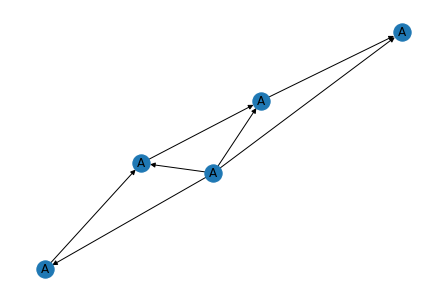

In [5]:
import networkx as nx
labels = nx.get_node_attributes(rn.network, 'struct')
labels = {key:gtostr(labels[key]) for key in labels.keys()}
nx.draw(rn.network, labels=labels)

for node in rn.network.nodes(data=True):
    st = gtostr(node[1]['struct'])
    n_edges = node[1]['struct'].number_of_edges()
#     st1 = [set(i) for i in node[1]['struct'].edges()]
#     a=[]
#     for i in st1:
#         a+=list(i) 
    
    if n_edges >= len(set(st)):
        st= st+n_edges*st
    print(st,"--",node[0])
#     print("".join(a), "--",node[0])
    print(node[1]['struct'].edges())
    
print(rn.network[1]) 

In [6]:
# def _equal(n1, n2) -> bool:
#     """
#     Test whether two structures have identical connectivity
#     :param n1: nx.Graph
#     :param n2: nx.Graph
#     :return: Boolean indicating whether or not graphs are equal
#     """
#     nm = nx.algorithms.isomorphism.categorical_node_match("label", None)
#     int_n1 = nx.convert_node_labels_to_integers(n1, label_attribute="label")
#     int_n2 = nx.convert_node_labels_to_integers(n2, label_attribute="label")
#     print(int_n1)
#     print(int_n2)
#     return nx.is_isomorphic(int_n1, int_n2, node_match=nm)

# repeat_units=False
# import networkx as nx
# for i in range(len(rn.network.nodes)):
#     for (u,v) in rn.network.nodes[i]['struct'].edges:
#         if u==v:
#             repeat_units=True
#             print(repeat_units)
#         print(u,v)
#     print(i)

# # orig = rn.network.nodes[0]['struct']
# # orig = nx.relabel_nodes(orig,{'A':'AA'})
# # orig.add_edge('A','AA')
# # print(orig.nodes.data)

# # print(orig.nodes)

# # node_exists = [x for x in rn.network.nodes(data=True) if
# #                        _equal(x[1]['struct'], orig)]

# # print(node_exists)

In [7]:
#Changing Initial Conditions
import networkx as nx
#Changin k_on
new_kon = [1.0,1.0,1.0,1.0,1.0,1.0]*np.array([1e0])  #Poor yield Simruntime = 1sec

update_kon_dict = {}
for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
    update_kon_dict[edge] = new_kon[uid_dict[edge]]

nx.set_edge_attributes(rn.network,update_kon_dict,'k_on')

for edge in rn.network.edges:
    print(rn.network.get_edge_data(edge[0],edge[1]))
vec_rn = VectorizedRxnNet(rn, dev='cpu')
print(vec_rn.kon)

{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-12.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-36.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-48.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-36.], dtype=torch.float64), 'uid': 2}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-48.], dtype=torch.float64), 'uid': 3}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-12.], dtype=torch.float64), 'uid': 0}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-24.], dtype=torch.float64), 'uid': 1}
{'k_on': 1.0, 'k_off': None, 'lcf': 1, 'rxn_score': tensor([-36.], dtype=torch.float64), 'uid': 2}
{'k_on': 1

## The Equilibrium Solution ##
First we will find the equilibrium solution for this system.

In [8]:
# vec_rn.update_reaction_net(rn,1)
# poly_system = EquilibriumSolver(rn)
# solution = poly_system.solve()
# if solution == None:
#     print("No Equilibrium solution")
# else:
#     print(solution)
#     print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
# print(vec_rn.kon)

In [9]:
# uid_dict = {}
# sys.path.append("../")
# import numpy as np
# from reaction_network import gtostr
# for n in rn.network.nodes():
#     #print(n)
#     #print(rn.network.nodes()[n])
#     for k,v in rn.network[n].items():
#         uid = v['uid']
#         r1 = set(gtostr(rn.network.nodes[n]['struct']))
#         p = set(gtostr(rn.network.nodes[k]['struct']))
#         r2 = p-r1
#         reactants = (r1,r2)
#         uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off'],'uid':uid}
#         if uid not in uid_dict.keys():
#             uid_dict[uid] = uid_val
#     print(gtostr(rn.network.nodes[n]['struct']))
#     #for r_set in rn.get_reactant_sets(n):
#     #    print(tuple(r_set))
#     #print(rn.network[n]['struct'])
# ind_sort = np.argsort(vec_rn.kon.detach().numpy())
# for i in ind_sort:
#     print(vec_rn.kon[i])
#     print(uid_dict[i])

In [10]:
# uid_dict = {}
# sys.path.append("../")
# import numpy as np
# from reaction_network import gtostr
# from torch import DoubleTensor as Tensor
# import torch

# node_map = {}
# for node in rn.network.nodes():
#     node_map[gtostr(rn.network.nodes[node]['struct'])] = node

# print(node_map)

# def get_max_edge(n):
#     """
#     Calculates the max rate (k_on) for a given node
#     To find out the maximum flow path to the final complex starting from the current node.
    
#     Can also calculate the total rate of consumption of a node by summing up all rates. 
#     Can tell which component is used quickly.
#     """
#     try:
#         edges = rn.network.out_edges(n)
#         #Loop over all edges
#         #Get attributes
#         if len(edges)==0:
#             return(False)
#         kon_max = -1
#         next_node = -1
        
#         kon_sum = 0
#         for edge in edges:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']
#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]
#             kon_sum+=temp_kon
            
#             if temp_kon > kon_max:
#                 kon_max = temp_kon
#                 next_node=edge[1]
#         return(kon_max,next_node,kon_sum)
#     except Exception as err:
#         raise(err)
# def get_node_flux(n):
#     total_flux_outedges = 0
#     total_flux_inedges = 0
#     #Go over all the out edges
#     edges_out = rn.network.out_edges(n)
#     if len(edges_out)>0:

#         for edge in edges_out:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]

#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Getting conc. of reactants and products
#             #Get product
#             prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

#             #Net flux from this edge = Generation - consumption
#             edge_flux = koff*solution[edge[1]] - temp_kon*(solution[edge[0]])*(solution[node_map[react]])
#             #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

#             print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
#             print("Net flux: ",edge_flux)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Free Energy: ",vec_rn.rxn_score_vec[uid])
#             print("Reaction data OUTWARD: ")
#             print(data)

#             total_flux_outedges+=edge_flux
    
#     #Now go over all the in edges
#     edges_in = rn.network.in_edges(n)
#     react_list = []
#     if len(edges_in) > 0:
#         for edge in edges_in:
#             if edge[0] in react_list:
#                 continue
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             uid = data['uid']


#             #Get generation rates; which would be kon
#             temp_kon = vec_rn.kon[uid]

#             #Get consumption rates; which is k_off
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Get conc. of reactants and products
#             prod = gtostr(rn.network.nodes[edge[1]]['struct'])
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
#             react_list.append(node_map[react])
#             #Net flux from this edge = Generation - consumption
#             edge_flux_in = temp_kon*(solution[edge[0]])*(solution[node_map[react]])- koff*solution[edge[1]]
#             #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


#             print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
#             print("Net flux: ",edge_flux_in)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Raction data INWARD: ")
#             print(data)

#             total_flux_inedges+=edge_flux_in
#     net_node_flux = total_flux_outedges + total_flux_inedges
    
#     return(net_node_flux)
# pathway = []
# kon_sumarray = []
# total_con_rate = {}
# net_flux = {}

# if solution != None:
#     for n in rn.network.nodes():

#         n_str = gtostr(rn.network.nodes[n]['struct']) 

#         paths = [n_str]
#         kon_sum = 0
#         temp_node = n
#         max_edge = True
#         consumption_rate = 0
#         if n < len(rn.network.nodes()):#num_monomers:
#     #         print("Current node: ")
#     #         print(n_str)
#             while max_edge:
#                 max_edge = get_max_edge(temp_node)
#                 if max_edge:
#                     total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
#                     temp_node = max_edge[1]
#                     kon_sum += max_edge[0].item()


#     #                 print("Next node: ")
#     #                 print(temp_node)

#                     paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
#                 else:
#                     break
#             pathway.append(paths)
#             kon_sumarray.append(kon_sum)
#             paths=[]

#         print("-------------------------------------------------------------------------------")
#         print("-------------------------------------------------------------------------------")
#         print("|                                                                             |")
#         node_flux = get_node_flux(n)
#         net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
#         print("|                                                                             |")
#         print("-------------------------------------------------------------------------------")
#         print("-------------------------------------------------------------------------------")

#     print(pathway)
#     print(kon_sumarray)
#     #print(total_con_rate)

In [11]:
# if solution != None:
#     for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#         print(k," : ", v.item())

In [12]:
# if solution !=None:
#     for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#         print(k," : ", v)



## Using the optimizer with a 1 second simulation runtime ##

In [13]:
vec_rn.reset(reset_params=True)
optim = Optimizer(reaction_network=vec_rn,
                  sim_runtime=1,
                  optim_iterations=5000,
                  learning_rate=new_kon[0]/1e2,
                  device='cpu',method="RMSprop")
optim.rn.update_reaction_net(rn)
optim.optimize()

Using CPU
Reaction Parameters before optimization: 
[Parameter containing:
tensor([1., 1., 1., 1.], dtype=torch.float64, requires_grad=True)]
Using CPU
Next time:  tensor(652.6441, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 0 was 8.37%
tensor([ 1.0000,  1.0000, 39.6456, 42.1537, 41.8898], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.9000, 0.9000, 1.1000, 1.1000], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1414, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1 was 9.73%
tensor([ 0.0000,  0.0000, 33.3503, 39.1228, 48.6916], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.8236, 0.8230, 1.1714, 1.1693], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0866, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending s

Next time:  tensor(1.0097, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 23 was 14.9%
tensor([ 0.1931,  4.6187, 13.4384, 19.2236, 74.6720], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1970, 0.9691, 1.6926, 1.6980], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0289, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 24 was 15.0%
tensor([ 0.1885,  4.4909, 13.1940, 18.8988, 75.1305], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1953, 0.9702, 1.7003, 1.7112], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0493, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 25 was 15.1%
tensor([ 0.1837,  4.3599, 12.9476, 18.5754, 75.5904], dtype=torch.float64,
       grad_fn=<MaxBackward2>)

Next time:  tensor(1.1631, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 46 was 16.4%
tensor([ 1.8406,  3.6863,  9.3586, 13.1613, 82.0131], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1602, 0.9794, 1.8694, 1.9522], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0172, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 47 was 16.4%
tensor([ 0.2952,  4.3696,  9.3314, 13.1546, 82.0706], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1585, 0.9802, 1.8752, 1.9608], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1243, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 48 was 16.4%
tensor([ 1.4180,  3.8711,  9.2030, 12.9374, 82.2962], dtype=torch.float64,
       grad_fn=<MaxBackward2>)

Next time:  tensor(1.0572, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 69 was 16.7%
tensor([ 0.2068,  4.3169,  8.5797, 11.9633, 83.5134], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1592, 0.9557, 1.9622, 2.0954], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0131, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 70 was 16.7%
tensor([ 0.1638,  4.5185,  8.5200, 11.7972, 83.6101], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1571, 0.9572, 1.9667, 2.1026], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0457, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 71 was 16.8%
tensor([ 0.1483,  4.3043,  8.2731, 11.5066, 84.0795], dtype=torch.float64,
       grad_fn=<MaxBackward2>)

Next time:  tensor(1.0315, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 92 was 17.0%
tensor([ 0.2878,  4.2702,  7.7230, 10.6759, 85.0598], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1569, 0.9733, 2.0806, 2.2438], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0675, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 93 was 17.0%
tensor([ 0.4010,  4.0675,  7.5541, 10.4679, 85.3860], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1552, 0.9743, 2.0843, 2.2498], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0881, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 94 was 17.1%
tensor([ 0.2894,  3.9328,  7.3601, 10.2410, 85.7601], dtype=torch.float64,
       grad_fn=<MaxBackward2>)

Next time:  tensor(1.0563, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 115 was 16.8%
tensor([ 0.2065,  4.5061,  8.2396, 11.1603, 84.2843], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1718, 0.9358, 2.1014, 2.3234], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0171, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 116 was 16.8%
tensor([ 0.2137,  4.7255,  8.2588, 11.0928, 84.2376], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1702, 0.9372, 2.1042, 2.3288], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0423, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 117 was 16.9%
tensor([ 0.2078,  4.5520,  8.0946, 10.9058, 84.5563], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.3703, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 138 was 18.4%
tensor([ 1.9999,  2.1235,  3.9454,  5.2150, 92.2113], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1108, 0.9876, 2.1972, 2.4586], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0404, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 139 was 18.5%
tensor([ 0.5217,  2.6768,  3.7036,  4.9095, 92.6752], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1140, 0.9839, 2.1948, 2.4584], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3454, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 140 was 18.4%
tensor([ 1.9999,  2.2026,  4.0160,  5.2936, 92.0744], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.0289, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 161 was 17.7%
tensor([2.2166e-03, 3.7005e+00, 5.7757e+00, 7.6103e+00, 8.8966e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1397, 0.9977, 2.2213, 2.5198], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0326, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 162 was 17.7%
tensor([ 0.6999,  3.6937,  5.8215,  7.5481, 88.8512], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1328, 1.0066, 2.2289, 2.5279], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2016, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 163 was 17.9%
tensor([ 1.9999,  2.9268,  5.3461,  6.9058, 89.6970], dtype=torch.float64,
       grad_

Next time:  tensor(1.2481, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 184 was 18.0%
tensor([ 1.9999,  2.7533,  5.0537,  6.4044, 90.3430], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1279, 1.0010, 2.2398, 2.5874], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0467, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 185 was 18.2%
tensor([1.1102e-16, 3.1859e+00, 4.7013e+00, 6.0769e+00, 9.1043e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1240, 1.0045, 2.2451, 2.5933], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2688, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 186 was 18.2%
tensor([ 1.9999,  2.5213,  4.5850,  5.8072, 91.1947], dtype=torch.float64,
       grad_

Next time:  tensor(1.0036, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 207 was 17.6%
tensor([1.9961e-02, 4.0717e+00, 6.1337e+00, 7.7771e+00, 8.8465e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1503, 0.9923, 2.3008, 2.6854], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0414, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 208 was 17.7%
tensor([7.4813e-02, 3.8522e+00, 5.9608e+00, 7.5858e+00, 8.8799e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1489, 0.9938, 2.3028, 2.6894], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2047, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 209 was 17.7%
tensor([ 1.5924,  3.2341,  5.9423,  7.5089, 88.8154], dtype=torch.float6

Next time:  tensor(1.2021, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 230 was 17.9%
tensor([ 1.5329,  3.2432,  5.3178,  6.5914, 89.9323], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1406, 0.9703, 2.3448, 2.7749], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2084, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 231 was 18.0%
tensor([ 1.5413,  3.2193,  5.2782,  6.5421, 90.0034], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1375, 0.9743, 2.3483, 2.7798], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0298, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 232 was 17.9%
tensor([ 1.1054,  3.7914,  5.2570,  6.4035, 89.9853], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.0357, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 253 was 18.2%
tensor([7.5324e-02, 3.4965e+00, 4.5188e+00, 5.5282e+00, 9.1452e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1288, 0.9719, 2.3685, 2.8454], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2252, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 254 was 18.3%
tensor([ 1.2409,  2.8864,  4.4132,  5.3656, 91.6569], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1464, 0.9487, 2.3493, 2.8338], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0230, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 255 was 17.8%
tensor([ 0.2619,  4.1637,  5.6043,  6.7867, 89.4902], dtype=torch.float64,
       grad_

Next time:  tensor(1.0748, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 276 was 19.0%
tensor([4.1527e-02, 2.0616e+00, 2.4425e+00, 2.9474e+00, 9.5344e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1060, 0.9867, 2.3980, 2.9095], dtype=torch.float64)
Using CPU
Next time:  tensor(1.6175, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 277 was 18.9%
tensor([ 1.9999,  1.3951,  2.6764,  3.2139, 94.8650], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1039, 0.9884, 2.4001, 2.9123], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0525, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 278 was 18.9%
tensor([ 1.1493,  2.2214,  2.7024,  3.1405, 94.7478], dtype=torch.float64,
       grad_

Next time:  tensor(1.0815, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 299 was 18.5%
tensor([ 0.1874,  2.8884,  3.8310,  4.6277, 92.8064], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1190, 1.0214, 2.4710, 3.0099], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4151, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 300 was 18.7%
tensor([ 1.9999,  1.8867,  3.3759,  4.0277, 93.5977], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1169, 1.0237, 2.4737, 3.0136], dtype=torch.float64)
Using CPU
Next time:  tensor(1.5053, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 301 was 18.7%
tensor([ 1.9999,  1.6557,  3.1655,  3.7997, 93.9987], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.1326, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 322 was 18.5%
tensor([ 1.9999,  2.2328,  4.0024,  4.7549, 92.5015], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1317, 1.1537, 2.5793, 3.1291], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2679, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 323 was 18.6%
tensor([ 1.2249,  1.8450,  3.5901,  4.3940, 93.3477], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.0743, 1.2300, 2.6478, 3.1874], dtype=torch.float64)
Using CPU
Next time:  tensor(1.7463, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 324 was 19.9%
tensor([2.6932e-01, 0.0000e+00, 8.6614e-03, 1.7905e-02, 9.9927e+01],
       dtype=torch.float64, grad_

Next time:  tensor(1.0636, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 345 was 18.8%
tensor([ 1.0390,  1.7945,  3.1727,  3.8791, 94.0675], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1216, 1.2562, 2.6829, 3.2348], dtype=torch.float64)
Using CPU
Next time:  tensor(1.8753, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 346 was 19.1%
tensor([ 1.9999,  0.5209,  2.3601,  2.9703, 95.5994], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1211, 1.2561, 2.6843, 3.2371], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0003, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 347 was 19.1%
tensor([ 0.0000,  1.4910,  2.3190,  2.9244, 95.6726], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.3241, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 368 was 18.7%
tensor([ 1.9066,  1.3272,  3.3161,  4.0924, 93.8242], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1468, 1.2669, 2.6853, 3.2641], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0566, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 369 was 18.5%
tensor([5.5511e-17, 2.0905e+00, 3.8869e+00, 4.8893e+00, 9.2920e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1451, 1.2714, 2.6841, 3.2649], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0972, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 370 was 18.4%
tensor([ 1.9999,  2.0284,  4.2125,  5.0359, 92.2325], dtype=torch.float64,
       grad_

Next time:  tensor(2.1020, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 391 was 19.3%
tensor([ 1.9999,  0.1546,  1.6750,  2.1271, 96.8316], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1147, 1.3129, 2.7242, 3.3306], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0930, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 392 was 19.3%
tensor([ 1.9999,  0.1582,  1.6689,  2.1058, 96.8508], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1142, 1.3135, 2.7245, 3.3317], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2394, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 393 was 19.3%
tensor([1.9999e+00, 8.2976e-02, 1.6303e+00, 2.0513e+00, 9.6948e+01],
       dtype=torch.float64, grad_

Next time:  tensor(1.2974, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 414 was 18.9%
tensor([ 1.9999,  1.0542,  2.9235,  3.5794, 94.5607], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1358, 1.3735, 2.8029, 3.4164], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3054, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 415 was 18.9%
tensor([ 1.9999,  1.0430,  2.9228,  3.5844, 94.5616], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1357, 1.3738, 2.8025, 3.4174], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2965, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 416 was 18.9%
tensor([ 1.9999,  1.0549,  2.9255,  3.5764, 94.5616], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.5551, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 437 was 19.5%
tensor([ 1.9999,  0.2172,  1.2216,  1.4593, 97.6127], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1094, 1.4066, 2.8333, 3.4698], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4427, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 438 was 19.5%
tensor([ 1.5452,  0.2730,  1.1159,  1.3432, 97.8377], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1072, 1.4088, 2.8361, 3.4728], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1706, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 439 was 19.7%
tensor([ 0.0000,  0.3816,  0.7714,  1.0213, 98.5674], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.6938, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 460 was 19.2%
tensor([ 1.9999,  0.4142,  2.1706,  2.6593, 96.0045], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1306, 1.4171, 2.8801, 3.5306], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0477, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 461 was 19.2%
tensor([ 0.1942,  1.0520,  2.0200,  2.6444, 96.2128], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1298, 1.4181, 2.8808, 3.5319], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0160, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 462 was 19.0%
tensor([ 1.9999,  1.1848,  2.4707,  2.8937, 95.3287], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(2.2439, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 483 was 19.8%
tensor([ 0.7819,  0.0000,  0.4822,  0.6067, 99.0689], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1014, 1.4526, 2.9002, 3.5584], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2701, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 484 was 19.8%
tensor([ 0.7120,  0.0000,  0.4421,  0.5589, 99.1452], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1006, 1.4533, 2.9007, 3.5590], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2994, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 485 was 19.8%
tensor([ 0.6437,  0.0000,  0.4036,  0.5130, 99.2187], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(2.1137, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 506 was 19.7%
tensor([ 0.9349,  0.0000,  0.6035,  0.7590, 98.8438], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1079, 1.5235, 2.9712, 3.6365], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1229, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 507 was 19.7%
tensor([ 0.8849,  0.0000,  0.5685,  0.7169, 98.9084], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1072, 1.5242, 2.9717, 3.6372], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1366, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 508 was 19.7%
tensor([ 0.8304,  0.0000,  0.5331,  0.6744, 98.9745], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.3640, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 529 was 19.4%
tensor([ 1.9999,  0.2819,  1.3848,  1.6655, 97.3240], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1210, 1.5486, 2.9940, 3.6663], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4149, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 530 was 19.4%
tensor([ 1.9999,  0.2280,  1.3208,  1.5913, 97.4433], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1200, 1.5497, 2.9948, 3.6675], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4775, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 531 was 19.5%
tensor([ 1.9999,  0.1701,  1.2555,  1.5156, 97.5662], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(2.1770, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 552 was 19.8%
tensor([ 0.5984,  0.0000,  0.4033,  0.5196, 99.2226], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1060, 1.5666, 3.0060, 3.6847], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2053, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 553 was 19.8%
tensor([5.4064e-01, 5.5511e-17, 3.6902e-01, 4.7806e-01, 9.9288e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1053, 1.5674, 3.0065, 3.6854], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2355, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 554 was 19.8%
tensor([4.8560e-01, 2.7756e-17, 3.3654e-01, 4.3864e-01, 9.9350e+01],
       dtype=torch

Next time:  tensor(1.0183, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 575 was 19.4%
tensor([ 0.0000,  0.7396,  1.5899,  2.1525, 97.0282], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1332, 1.5843, 3.0157, 3.7047], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0594, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 576 was 19.3%
tensor([1.7939e+00, 1.1102e-16, 1.6406e+00, 2.1480e+00, 9.6938e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1339, 1.5836, 3.0142, 3.7041], dtype=torch.float64)
Using CPU
Next time:  tensor(1.0318, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 577 was 19.4%
tensor([ 0.0000,  0.7142,  1.5543,  2.1114, 97.0926], dtype=torch.float64,
       grad_

Next time:  tensor(1.1057, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 598 was 19.7%
tensor([ 0.0000,  0.3124,  0.7606,  1.0015, 98.6175], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1177, 1.6069, 3.0279, 3.7340], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1459, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 599 was 19.7%
tensor([5.5511e-17, 2.9708e-01, 7.4058e-01, 9.6982e-01, 9.8661e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1164, 1.6085, 3.0292, 3.7356], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1852, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 600 was 19.7%
tensor([ 0.8132,  0.0000,  0.7418,  0.9335, 98.6455], dtype=torch.float64,
       grad_

Next time:  tensor(2.1150, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 621 was 19.8%
tensor([ 0.6075,  0.0000,  0.4246,  0.5431, 99.1893], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1088, 1.6184, 3.0354, 3.7500], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1485, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 622 was 19.8%
tensor([ 0.5363,  0.0000,  0.3806,  0.4901, 99.2723], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1079, 1.6195, 3.0361, 3.7510], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1850, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 623 was 19.8%
tensor([ 0.4693,  0.0000,  0.3395,  0.4405, 99.3501], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.0010, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 644 was 19.0%
tensor([ 0.0000,  1.0551,  2.5721,  3.3323, 95.3688], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1504, 1.6324, 3.0324, 3.7623], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1161, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 645 was 18.9%
tensor([ 1.9999,  0.8903,  2.8669,  3.4550, 94.7598], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1481, 1.6367, 3.0354, 3.7669], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1642, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 646 was 19.0%
tensor([ 1.9999,  0.7729,  2.6828,  3.2437, 95.0862], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.1685, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 666 was 19.9%
tensor([2.2204e-16, 0.0000e+00, 3.6830e-02, 6.5906e-02, 9.9927e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1017, 1.6935, 3.0855, 3.8229], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1762, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 667 was 19.9%
tensor([0.0000e+00, 0.0000e+00, 3.5160e-02, 6.3729e-02, 9.9930e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1016, 1.6936, 3.0855, 3.8229], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1839, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 668 was 19.9%
tensor([0.0000e+00, 0.0000e+00, 3.3521e-02, 6.1591e-02, 9.9934e+01],
   

Next time:  tensor(1.1821, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 688 was 19.9%
tensor([7.8610e-02, 5.5511e-17, 3.3883e-02, 5.9071e-02, 9.9917e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1010, 1.6941, 3.0859, 3.8234], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1825, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 689 was 19.9%
tensor([7.9101e-02, 2.7756e-17, 3.3816e-02, 5.8966e-02, 9.9917e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1009, 1.6941, 3.0859, 3.8234], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1829, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 690 was 19.9%
tensor([7.9594e-02, 2.7756e-17, 3.3750e-02, 5.8860e-02, 9.9917e+01],
   

Next time:  tensor(1.1903, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 710 was 19.9%
tensor([8.9712e-02, 5.5511e-17, 3.2387e-02, 5.6692e-02, 9.9917e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1008, 1.6943, 3.0860, 3.8237], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1907, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 711 was 19.9%
tensor([9.0231e-02, 2.7756e-17, 3.2318e-02, 5.6581e-02, 9.9917e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1008, 1.6943, 3.0860, 3.8237], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1910, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 712 was 19.9%
tensor([9.0751e-02, 0.0000e+00, 3.2248e-02, 5.6469e-02, 9.9917e+01],
   

Next time:  tensor(1.1993, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 732 was 19.9%
tensor([1.0143e-01, 0.0000e+00, 3.0817e-02, 5.4187e-02, 9.9918e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1006, 1.6946, 3.0862, 3.8239], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1997, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 733 was 19.9%
tensor([1.0197e-01, 2.7756e-17, 3.0744e-02, 5.4070e-02, 9.9918e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1006, 1.6946, 3.0862, 3.8240], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2002, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 734 was 19.9%
tensor([1.0252e-01, 0.0000e+00, 3.0671e-02, 5.3953e-02, 9.9918e+01],
   

Next time:  tensor(1.2094, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 754 was 19.9%
tensor([1.1375e-01, 5.5511e-17, 2.9173e-02, 5.1557e-02, 9.9919e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1004, 1.6948, 3.0863, 3.8242], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2098, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 755 was 19.9%
tensor([1.1432e-01, 0.0000e+00, 2.9096e-02, 5.1435e-02, 9.9919e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1003, 1.6949, 3.0863, 3.8243], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2103, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 756 was 19.9%
tensor([1.1490e-01, 0.0000e+00, 2.9020e-02, 5.1312e-02, 9.9919e+01],
   

Next time:  tensor(1.2206, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 776 was 19.9%
tensor([1.2667e-01, 0.0000e+00, 2.7455e-02, 4.8802e-02, 9.9919e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1001, 1.6952, 3.0865, 3.8245], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2211, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 777 was 19.9%
tensor([1.2727e-01, 0.0000e+00, 2.7375e-02, 4.8674e-02, 9.9919e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1001, 1.6952, 3.0865, 3.8246], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2217, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 778 was 19.9%
tensor([1.2787e-01, 2.7756e-17, 2.7295e-02, 4.8545e-02, 9.9919e+01],
   

Next time:  tensor(1.9943, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 798 was 19.8%
tensor([6.9996e-01, 5.5511e-17, 5.0999e-01, 6.4896e-01, 9.9035e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1153, 1.6991, 3.0910, 3.8304], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0039, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 799 was 19.8%
tensor([6.7216e-01, 5.5511e-17, 4.9093e-01, 6.2602e-01, 9.9070e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1149, 1.6993, 3.0913, 3.8307], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0143, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 800 was 19.8%
tensor([6.4436e-01, 5.5511e-17, 4.7213e-01, 6.0336e-01, 9.9105e+01],
   

Next time:  tensor(2.3404, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 821 was 19.9%
tensor([ 0.1800,  0.0000,  0.1691,  0.2336, 99.6756], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1072, 1.7042, 3.0959, 3.8369], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3596, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 822 was 19.9%
tensor([1.6527e-01, 1.3878e-17, 1.5935e-01, 2.2144e-01, 9.9694e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1069, 1.7044, 3.0961, 3.8371], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3790, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 823 was 19.9%
tensor([1.5117e-01, 1.3878e-17, 1.4997e-01, 2.0974e-01, 9.9712e+01],
       dtype=torch

Next time:  tensor(1.1993, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 843 was 19.9%
tensor([1.1102e-16, 0.0000e+00, 2.9139e-02, 5.5939e-02, 9.9942e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1019, 1.7076, 3.0990, 3.8405], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2171, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 844 was 19.9%
tensor([0.0000e+00, 0.0000e+00, 2.5676e-02, 5.1393e-02, 9.9949e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1017, 1.7077, 3.0991, 3.8406], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1725, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 845 was 19.9%
tensor([7.4518e-02, 8.3267e-17, 3.4583e-02, 6.0214e-02, 9.9916e+01],
   

Next time:  tensor(1.1884, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 865 was 19.9%
tensor([9.6277e-02, 2.7756e-17, 3.1635e-02, 5.5521e-02, 9.9917e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1013, 1.7082, 3.0993, 3.8411], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1893, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 866 was 19.9%
tensor([9.7361e-02, 0.0000e+00, 3.1489e-02, 5.5287e-02, 9.9917e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1013, 1.7082, 3.0993, 3.8412], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1901, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 867 was 19.9%
tensor([9.8444e-02, 0.0000e+00, 3.1343e-02, 5.5054e-02, 9.9917e+01],
   

Next time:  tensor(1.2079, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 887 was 19.9%
tensor([1.2003e-01, 5.5511e-17, 2.8444e-02, 5.0416e-02, 9.9919e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1009, 1.7088, 3.0996, 3.8417], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2088, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 888 was 19.9%
tensor([1.2111e-01, 0.0000e+00, 2.8300e-02, 5.0185e-02, 9.9919e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1009, 1.7088, 3.0996, 3.8417], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2097, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 889 was 19.9%
tensor([1.2218e-01, 0.0000e+00, 2.8156e-02, 4.9955e-02, 9.9919e+01],
   

Next time:  tensor(1.2296, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 909 was 19.9%
tensor([1.4361e-01, 0.0000e+00, 2.5295e-02, 4.5353e-02, 9.9920e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1005, 1.7094, 3.0999, 3.8423], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2307, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 910 was 19.9%
tensor([1.4468e-01, 5.5511e-17, 2.5153e-02, 4.5123e-02, 9.9920e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1005, 1.7094, 3.0999, 3.8423], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2318, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 911 was 19.9%
tensor([1.4575e-01, 0.0000e+00, 2.5010e-02, 4.4893e-02, 9.9920e+01],
   

Next time:  tensor(1.2544, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 931 was 19.9%
tensor([1.6707e-01, 0.0000e+00, 2.2171e-02, 4.0302e-02, 9.9921e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1000, 1.7101, 3.1002, 3.8428], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2556, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 932 was 19.9%
tensor([1.6813e-01, 2.7756e-17, 2.2029e-02, 4.0072e-02, 9.9921e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1000, 1.7101, 3.1002, 3.8429], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2568, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 933 was 19.9%
tensor([1.6919e-01, 0.0000e+00, 2.1887e-02, 3.9842e-02, 9.9921e+01],
   

Next time:  tensor(1.0913, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 954 was 19.7%
tensor([ 0.0000,  0.2699,  0.7588,  1.0006, 98.6362], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1240, 1.7222, 3.1145, 3.8656], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1127, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 955 was 19.7%
tensor([ 0.0000,  0.2643,  0.7462,  0.9782, 98.6641], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1231, 1.7228, 3.1152, 3.8666], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0151, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 956 was 19.7%
tensor([ 0.3632,  0.0000,  0.6821,  0.9036, 98.7952], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(2.2512, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 977 was 19.9%
tensor([ 0.2281,  0.0000,  0.2032,  0.2756, 99.6120], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1094, 1.7325, 3.1246, 3.8810], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2876, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 978 was 19.9%
tensor([ 0.1955,  0.0000,  0.1815,  0.2488, 99.6529], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1088, 1.7329, 3.1250, 3.8815], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3248, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 979 was 19.9%
tensor([ 0.1658,  0.0000,  0.1616,  0.2241, 99.6906], dtype=torch.float64,
       grad_fn=<MaxBackward

Next time:  tensor(1.1817, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 999 was 19.9%
tensor([1.0656e-01, 0.0000e+00, 3.0506e-02, 5.3616e-02, 9.9917e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1026, 1.7374, 3.1289, 3.8863], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1832, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1000 was 19.9%
tensor([1.0843e-01, 0.0000e+00, 3.0252e-02, 5.3211e-02, 9.9918e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1026, 1.7375, 3.1289, 3.8863], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1847, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1001 was 19.9%
tensor([1.1029e-01, 0.0000e+00, 2.9999e-02, 5.2807e-02, 9.9918e+01],
 

Next time:  tensor(1.2169, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1021 was 19.9%
tensor([1.4600e-01, 0.0000e+00, 2.5164e-02, 4.5057e-02, 9.9920e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1019, 1.7385, 3.1294, 3.8873], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2186, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1022 was 19.9%
tensor([1.4772e-01, 0.0000e+00, 2.4932e-02, 4.4684e-02, 9.9920e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1018, 1.7386, 3.1294, 3.8873], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2203, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1023 was 19.9%
tensor([1.4943e-01, 0.0000e+00, 2.4701e-02, 4.4312e-02, 9.9920e+01],


Next time:  tensor(1.2575, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1043 was 19.9%
tensor([1.8251e-01, 0.0000e+00, 2.0231e-02, 3.7084e-02, 9.9922e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1011, 1.7398, 3.1299, 3.8882], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2595, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1044 was 19.9%
tensor([1.8411e-01, 0.0000e+00, 2.0014e-02, 3.6731e-02, 9.9922e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1011, 1.7399, 3.1299, 3.8883], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2615, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1045 was 19.9%
tensor([1.8570e-01, 0.0000e+00, 1.9797e-02, 3.6379e-02, 9.9922e+01],


Next time:  tensor(1.3062, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1065 was 19.9%
tensor([2.1674e-01, 0.0000e+00, 1.5547e-02, 2.9445e-02, 9.9924e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1003, 1.7412, 3.1304, 3.8891], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3087, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1066 was 19.9%
tensor([2.1825e-01, 1.3878e-17, 1.5338e-02, 2.9102e-02, 9.9924e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1003, 1.7413, 3.1304, 3.8892], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3112, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1067 was 19.9%
tensor([2.1975e-01, 0.0000e+00, 1.5129e-02, 2.8759e-02, 9.9924e+01],


Next time:  tensor(2.1255, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1087 was 19.4%
tensor([ 1.1723,  0.0000,  1.5850,  2.0557, 97.1700], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.0545, 1.8484, 3.2496, 4.0266], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3717, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1088 was 19.9%
tensor([1.6774e+00, 5.3010e-02, 3.3500e-02, 2.9417e-02, 9.9600e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.0843, 1.8484, 3.2496, 4.0266], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2694, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1089 was 19.9%
tensor([7.8723e-01, 3.2212e-02, 2.2017e-02, 2.0798e-02, 9.9800e+01],
       dtype=to

Next time:  tensor(1.2017, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1109 was 19.9%
tensor([0.0000e+00, 0.0000e+00, 1.6433e-02, 3.9881e-02, 9.9966e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1084, 1.8533, 3.2527, 4.0302], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2185, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1110 was 19.9%
tensor([1.1102e-16, 0.0000e+00, 1.3610e-02, 3.6088e-02, 9.9971e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1082, 1.8534, 3.2528, 4.0303], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2351, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1111 was 19.9%
tensor([0.0000e+00, 0.0000e+00, 1.0935e-02, 3.2483e-02, 9.9976e+01],


Next time:  tensor(1.1810, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1131 was 19.9%
tensor([1.6473e-01, 0.0000e+00, 2.3017e-02, 4.2060e-02, 9.9920e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1072, 1.8550, 3.2535, 4.0313], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1821, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1132 was 19.9%
tensor([1.6571e-01, 2.7756e-17, 2.2879e-02, 4.1835e-02, 9.9920e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1072, 1.8550, 3.2536, 4.0313], dtype=torch.float64)
Using CPU
Next time:  tensor(1.1832, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1133 was 19.9%
tensor([1.6669e-01, 0.0000e+00, 2.2740e-02, 4.1609e-02, 9.9920e+01],


Next time:  tensor(1.2065, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1153 was 19.9%
tensor([1.8629e-01, 0.0000e+00, 1.9961e-02, 3.7069e-02, 9.9921e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1067, 1.8561, 3.2539, 4.0318], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2078, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1154 was 19.9%
tensor([1.8727e-01, 0.0000e+00, 1.9822e-02, 3.6840e-02, 9.9921e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1067, 1.8562, 3.2539, 4.0319], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2090, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1155 was 19.9%
tensor([1.8825e-01, 0.0000e+00, 1.9682e-02, 3.6612e-02, 9.9921e+01],


Next time:  tensor(1.2363, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1175 was 19.9%
tensor([2.0779e-01, 0.0000e+00, 1.6879e-02, 3.2006e-02, 9.9923e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1062, 1.8574, 3.2542, 4.0324], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2378, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1176 was 19.9%
tensor([2.0877e-01, 0.0000e+00, 1.6738e-02, 3.1773e-02, 9.9923e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1062, 1.8575, 3.2542, 4.0325], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2393, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1177 was 19.9%
tensor([2.0974e-01, 0.0000e+00, 1.6597e-02, 3.1541e-02, 9.9923e+01],


Next time:  tensor(1.2719, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1197 was 19.9%
tensor([2.2911e-01, 0.0000e+00, 1.3759e-02, 2.6848e-02, 9.9924e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1056, 1.8589, 3.2546, 4.0330], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2737, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1198 was 19.9%
tensor([2.3007e-01, 0.0000e+00, 1.3616e-02, 2.6611e-02, 9.9925e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1056, 1.8590, 3.2546, 4.0330], dtype=torch.float64)
Using CPU
Next time:  tensor(1.2755, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1199 was 19.9%
tensor([2.3103e-01, 2.7756e-17, 1.3473e-02, 2.6373e-02, 9.9925e+01],


Next time:  tensor(1.3154, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1219 was 19.9%
tensor([2.4998e-01, 0.0000e+00, 1.0587e-02, 2.1568e-02, 9.9926e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1050, 1.8606, 3.2549, 4.0336], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3176, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1220 was 19.9%
tensor([2.5091e-01, 0.0000e+00, 1.0442e-02, 2.1325e-02, 9.9926e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1050, 1.8607, 3.2549, 4.0336], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3198, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1221 was 19.9%
tensor([2.5184e-01, 0.0000e+00, 1.0296e-02, 2.1081e-02, 9.9927e+01],


Next time:  tensor(1.3702, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1241 was 19.9%
tensor([2.6993e-01, 0.0000e+00, 7.3540e-03, 1.6143e-02, 9.9929e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1043, 1.8625, 3.2553, 4.0342], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3731, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1242 was 19.9%
tensor([2.7080e-01, 1.3878e-17, 7.2055e-03, 1.5893e-02, 9.9929e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1042, 1.8626, 3.2553, 4.0342], dtype=torch.float64)
Using CPU
Next time:  tensor(1.3760, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1243 was 19.9%
tensor([2.7167e-01, 0.0000e+00, 7.0569e-03, 1.5643e-02, 9.9929e+01],


Next time:  tensor(1.4421, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1263 was 19.9%
tensor([2.8798e-01, 0.0000e+00, 4.0617e-03, 1.0570e-02, 9.9932e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1034, 1.8648, 3.2557, 4.0347], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4459, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1264 was 19.9%
tensor([2.8873e-01, 1.3878e-17, 3.9111e-03, 1.0313e-02, 9.9932e+01],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1034, 1.8649, 3.2557, 4.0348], dtype=torch.float64)
Using CPU
Next time:  tensor(1.4498, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1265 was 19.9%
tensor([2.8947e-01, 0.0000e+00, 3.7604e-03, 1.0057e-02, 9.9932e+01],


Next time:  tensor(2.0238, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1285 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0661], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1022, 1.8673, 3.2566, 4.0354], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0300, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1286 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0662], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1022, 1.8674, 3.2566, 4.0354], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0360, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1287 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0663], dtype=torch.float64,
       gr

Next time:  tensor(2.1217, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1308 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1017, 1.8695, 3.2571, 4.0355], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1243, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1309 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0671], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1016, 1.8696, 3.2571, 4.0355], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1268, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1310 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0671], dtype=torch.float64,

Next time:  tensor(2.1627, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1331 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1015, 1.8716, 3.2575, 4.0354], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1637, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1332 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1015, 1.8717, 3.2575, 4.0354], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1648, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1333 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.f

Next time:  tensor(2.1786, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1354 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1014, 1.8738, 3.2578, 4.0352], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1790, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1355 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1014, 1.8739, 3.2578, 4.0352], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1794, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1356 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       gr

Next time:  tensor(2.1840, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1377 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1015, 1.8761, 3.2581, 4.0349], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1841, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1378 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1015, 1.8763, 3.2581, 4.0348], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1843, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1379 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,

Next time:  tensor(2.1853, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1399 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1016, 1.8787, 3.2584, 4.0345], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1853, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1400 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1016, 1.8788, 3.2584, 4.0345], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1854, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1401 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       gr

Next time:  tensor(2.1853, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1422 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1017, 1.8816, 3.2588, 4.0341], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1852, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1423 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1017, 1.8818, 3.2588, 4.0341], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1852, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1424 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0672], dtype=torch.float64,

Next time:  tensor(2.1847, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1445 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0671], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1018, 1.8850, 3.2592, 4.0336], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1847, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1446 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1018, 1.8851, 3.2592, 4.0336], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1847, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1447 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0671], dtype=torch.float64,

Next time:  tensor(2.1840, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1467 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0671], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1019, 1.8885, 3.2596, 4.0331], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1840, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1468 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1019, 1.8887, 3.2596, 4.0331], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1840, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1469 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0671], dtype=torch.float64,

Next time:  tensor(2.1832, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1489 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1020, 1.8925, 3.2601, 4.0325], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1832, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1490 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0671], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1020, 1.8927, 3.2601, 4.0325], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1832, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1491 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0671], dtype=torch.float64,

Next time:  tensor(2.1823, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1512 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0670], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1022, 1.8971, 3.2607, 4.0319], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1823, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1513 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0670], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1022, 1.8973, 3.2607, 4.0318], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1822, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1514 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.f

Next time:  tensor(2.1814, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1534 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0670], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1024, 1.9021, 3.2613, 4.0312], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1813, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1535 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0670], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1024, 1.9023, 3.2613, 4.0311], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1813, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1536 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0670], dtype=torch.float64,
       gr

Next time:  tensor(2.1802, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1557 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1026, 1.9079, 3.2620, 4.0303], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1802, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1558 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0669], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1026, 1.9082, 3.2620, 4.0303], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1801, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1559 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0669], dtype=torch.float64,

Next time:  tensor(2.1790, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1580 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0669], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1028, 1.9145, 3.2628, 4.0294], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1790, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1581 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1028, 1.9148, 3.2628, 4.0293], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1789, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1582 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0669], dtype=torch.float64,

Next time:  tensor(2.1777, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1602 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0668], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1030, 1.9215, 3.2636, 4.0284], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1776, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1603 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1030, 1.9218, 3.2637, 4.0283], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1776, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1604 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dty

Next time:  tensor(2.1762, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1625 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0668], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1033, 1.9297, 3.2646, 4.0272], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1762, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1626 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0668], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1033, 1.9301, 3.2647, 4.0272], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1761, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1627 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0668], dtype=torch.float64,
       gr

Next time:  tensor(2.1747, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1647 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0667], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1036, 1.9384, 3.2657, 4.0260], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1746, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1648 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0667], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1036, 1.9389, 3.2658, 4.0259], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1745, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1649 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0667], dtype=torch.float64,
       gr

Next time:  tensor(2.1729, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1670 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0666], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1039, 1.9487, 3.2670, 4.0245], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1728, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1671 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0666], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1039, 1.9492, 3.2671, 4.0245], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1727, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1672 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0666], dtype=torch.float64,
       gr

Next time:  tensor(2.1709, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1693 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0665], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1043, 1.9602, 3.2684, 4.0229], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1708, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1694 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0665], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1043, 1.9608, 3.2685, 4.0228], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1707, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1695 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0665], dtype=torch.float64,
       gr

Next time:  tensor(2.1689, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1715 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1047, 1.9726, 3.2700, 4.0212], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1688, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1716 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0664], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1047, 1.9732, 3.2701, 4.0211], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1687, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1717 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0664], dtype=torch.float64,

Next time:  tensor(2.1666, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1738 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1052, 1.9870, 3.2718, 4.0192], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1665, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1739 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0663], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1052, 1.9877, 3.2719, 4.0191], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1664, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1740 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0663], dtype=torch.float64,

Next time:  tensor(2.1643, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1760 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1057, 2.0025, 3.2738, 4.0170], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1642, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1761 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0662], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1057, 2.0032, 3.2739, 4.0169], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1641, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1762 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0662], dtype=torch.float64,

Next time:  tensor(2.1618, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1782 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0660], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1063, 2.0197, 3.2760, 4.0146], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1616, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1783 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1063, 2.0206, 3.2761, 4.0145], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1615, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1784 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0660], dtype=torch.float64,

Next time:  tensor(2.1591, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1804 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0659], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1069, 2.0390, 3.2785, 4.0119], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1590, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1805 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0658], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1069, 2.0399, 3.2787, 4.0118], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1589, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1806 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0658], dtype=torch.float64,
       gr

Next time:  tensor(2.1562, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1827 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0657], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1076, 2.0615, 3.2815, 4.0088], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1560, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1828 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1076, 2.0626, 3.2816, 4.0087], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1559, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1829 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0656], dtype=torch.float64,

Next time:  tensor(2.1531, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1850 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0654], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1084, 2.0868, 3.2849, 4.0054], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1530, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1851 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0654], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1084, 2.0879, 3.2850, 4.0052], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1528, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1852 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0654], dtype=torch.float64,
       gr

Next time:  tensor(2.1499, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1873 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1093, 2.1151, 3.2887, 4.0015], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1498, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1874 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0652], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1093, 2.1164, 3.2889, 4.0013], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1496, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1875 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0007e+02],
       dty

Next time:  tensor(2.1467, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1896 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0649], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1103, 2.1468, 3.2930, 3.9972], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1465, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1897 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0649], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1103, 2.1482, 3.2932, 3.9970], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1464, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1898 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0649], dtype=torch.float64,
       gr

Next time:  tensor(2.1434, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1919 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0006e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1113, 2.1823, 3.2980, 3.9925], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1433, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1920 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0646], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1114, 2.1839, 3.2982, 3.9923], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1432, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1921 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0646], dtype=torch.float64,

Next time:  tensor(2.1402, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1942 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0643], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1125, 2.2221, 3.3036, 3.9872], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1401, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1943 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0006e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1126, 2.2239, 3.3039, 3.9870], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1400, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1944 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0642], dtype=torch.float64,

Next time:  tensor(2.1373, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1964 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0639], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1138, 2.2645, 3.3097, 3.9816], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1372, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1965 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0639], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1138, 2.2665, 3.3100, 3.9814], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1371, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1966 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0638], dtype=torch.float64,
       gr

Next time:  tensor(2.1345, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1987 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0634], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1152, 2.3139, 3.3170, 3.9752], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1344, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1988 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0634], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1153, 2.3162, 3.3173, 3.9749], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1343, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 1989 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0634], dtype=torch.float64,
       gr

Next time:  tensor(2.1321, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2010 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0629], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1168, 2.3691, 3.3252, 3.9682], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1320, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2011 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0629], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1168, 2.3717, 3.3256, 3.9679], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1319, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2012 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0629], dtype=torch.float64,
       gr

Next time:  tensor(2.1302, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2033 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0624], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1185, 2.4307, 3.3347, 3.9604], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1301, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2034 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0623], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1186, 2.4335, 3.3351, 3.9601], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1300, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2035 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0623], dtype=torch.float64,
       gr

Next time:  tensor(2.1290, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2056 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0617], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1203, 2.4992, 3.3454, 3.9520], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1289, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2057 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0006e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1204, 2.5024, 3.3459, 3.9516], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1289, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2058 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0617], dtype=torch.float64,

Next time:  tensor(2.1286, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2079 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0610], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1223, 2.5753, 3.3577, 3.9428], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1286, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2080 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0610], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1224, 2.5788, 3.3583, 3.9424], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1286, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2081 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0610], dtype=torch.float64,
       gr

Next time:  tensor(2.1293, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2102 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0603], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1245, 2.6596, 3.3717, 3.9328], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1293, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2103 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0603], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1246, 2.6635, 3.3723, 3.9324], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1294, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2104 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0602], dtype=torch.float64,
       gr

Next time:  tensor(2.1312, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2125 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0595], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1268, 2.7528, 3.3875, 3.9221], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1313, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2126 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0594], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1269, 2.7571, 3.3883, 3.9217], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1314, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2127 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0006e+02],
       dtype=torch.f

Next time:  tensor(2.1345, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2148 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0585], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1292, 2.8554, 3.4055, 3.9107], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1347, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2149 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0006e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1294, 2.8601, 3.4064, 3.9102], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1348, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2150 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0585], dtype=torch.float64,

Next time:  tensor(2.1393, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2171 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0576], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1318, 2.9679, 3.4259, 3.8986], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1396, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2172 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0575], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1320, 2.9730, 3.4269, 3.8980], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1398, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2173 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0006e+02],
       dtype=torch.f

Next time:  tensor(2.1455, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2193 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0566], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1344, 3.0850, 3.4479, 3.8864], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1458, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2194 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0565], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1346, 3.0906, 3.4490, 3.8859], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1462, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2195 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0565], dtype=torch.float64,
       gr

Next time:  tensor(2.1536, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2216 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0006e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1373, 3.2178, 3.4737, 3.8732], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1540, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2217 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0006e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1374, 3.2238, 3.4749, 3.8727], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1544, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2218 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0554], dtype=torc

Next time:  tensor(2.1634, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2239 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0543], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1402, 3.3611, 3.5026, 3.8597], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1639, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2240 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0543], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1404, 3.3676, 3.5039, 3.8592], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1644, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2241 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0542], dtype=torch.float64,
       gr

Next time:  tensor(2.1747, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2262 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0532], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1433, 3.5148, 3.5348, 3.8461], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1753, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2263 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0531], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1434, 3.5217, 3.5363, 3.8455], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1758, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2264 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0531], dtype=torch.float64,
       gr

Next time:  tensor(2.1874, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2285 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0520], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1464, 3.6784, 3.5706, 3.8327], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1880, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2286 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0005e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1465, 3.6858, 3.5723, 3.8321], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1885, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2287 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0519], dtype=torch.float64,

Next time:  tensor(2.2010, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2308 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0508], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1495, 3.8516, 3.6102, 3.8197], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2017, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2309 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0507], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1497, 3.8593, 3.6120, 3.8191], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2023, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2310 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0507], dtype=torch.float64,
       gr

Next time:  tensor(2.2153, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2331 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0496], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1528, 4.0335, 3.6537, 3.8076], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2161, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2332 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0496], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1529, 4.0416, 3.6557, 3.8071], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2164, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2333 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0495], dtype=torch.float64,
       gr

Next time:  tensor(2.7530, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2354 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0411], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1580, 4.2234, 3.6987, 3.7950], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0225, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2355 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0466], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1519, 4.2330, 3.7086, 3.8078], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6815, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2356 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0426], dtype=torch.float64,
       gr

Next time:  tensor(1.9757, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2377 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0443], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1532, 4.4224, 3.7570, 3.8090], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8583, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2378 was 20.0%
tensor([2.2204e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1607, 4.4300, 3.7501, 3.7952], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1168, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2379 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0005e+02],
       dty

Next time:  tensor(2.6145, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2400 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0425], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1652, 4.6244, 3.7951, 3.7927], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9921, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2401 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0432], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1565, 4.6347, 3.8079, 3.8084], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8695, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2402 was 20.0%
tensor([0.0000e+00, 5.5967e-05, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.f

Next time:  tensor(2.8374, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2422 was 20.0%
tensor([2.2204e-16, 1.9437e-04, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1673, 4.8237, 3.8431, 3.7961], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1038, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2423 was 20.0%
tensor([5.5511e-17, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1623, 4.8335, 3.8515, 3.8049], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6240, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2424 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0416], dtype=torc

Next time:  tensor(2.5464, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2444 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0421], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1712, 5.0266, 3.8892, 3.7975], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0374, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2445 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0416], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1629, 5.0369, 3.9013, 3.8113], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8539, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2446 was 20.0%
tensor([0.0000e+00, 5.4093e-04, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.f

Next time:  tensor(2.9045, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2466 was 20.0%
tensor([0.0000e+00, 9.1746e-04, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1730, 5.2330, 3.9378, 3.8036], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1705, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2467 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0425], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1690, 5.2428, 3.9447, 3.8101], dtype=torch.float64)
Using CPU
Next time:  tensor(2.5673, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2468 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0411], dtype=torch.float64,

Next time:  tensor(2.6557, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2488 was 20.0%
tensor([0.0000e+00, 2.4085e-04, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1773, 5.4417, 3.9835, 3.8064], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0554, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2489 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0395], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1681, 5.4522, 3.9963, 3.8207], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9187, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2490 was 20.0%
tensor([5.5511e-17, 1.1692e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dty

Next time:  tensor(2.9028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2510 was 20.0%
tensor([0.0000e+00, 1.2728e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1790, 5.6531, 4.0321, 3.8142], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1723, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2511 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0403], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1739, 5.6631, 4.0402, 3.8222], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6681, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2512 was 20.0%
tensor([1.1102e-16, 5.1559e-04, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dty

Next time:  tensor(2.6250, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2532 was 20.0%
tensor([0.0000e+00, 5.3198e-04, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1828, 5.8660, 4.0784, 3.8197], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0963, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2533 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0381], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1739, 5.8764, 4.0907, 3.8330], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9218, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2534 was 20.0%
tensor([0.0000e+00, 1.4868e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dty

Next time:  tensor(2.9583, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2554 was 20.0%
tensor([5.5511e-17, 1.6973e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1843, 6.0807, 4.1272, 3.8294], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2250, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2555 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1799, 6.0908, 4.1344, 3.8361], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6467, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2556 was 20.0%
tensor([0.0000e+00, 7.8973e-04, 0.0000e+00, 0.0000e+00, 1.0004e+02],


Next time:  tensor(2.7015, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2576 was 20.0%
tensor([0.0000e+00, 1.0955e-03, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1883, 6.2964, 4.1732, 3.8361], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1186, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2577 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0364], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1788, 6.3069, 4.1859, 3.8496], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9731, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2578 was 20.0%
tensor([5.5511e-17, 1.8514e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dty

Next time:  tensor(2.9722, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2598 was 20.0%
tensor([0.0000e+00, 1.9351e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1898, 6.5133, 4.2219, 3.8471], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2389, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2599 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0372], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1846, 6.5235, 4.2298, 3.8546], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7140, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2600 was 20.0%
tensor([0.0000e+00, 1.2667e-03, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dty

Next time:  tensor(2.7041, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2620 was 20.0%
tensor([0.0000e+00, 1.3372e-03, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1935, 6.7308, 4.2682, 3.8556], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1517, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2621 was 20.0%
tensor([1.1102e-16, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1840, 6.7412, 4.2807, 3.8688], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9902, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2622 was 20.0%
tensor([1.1102e-16, 2.0656e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(3.0101, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2642 was 20.0%
tensor([5.5511e-17, 2.1726e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1948, 6.9491, 4.3170, 3.8680], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2743, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2643 was 20.0%
tensor([0.0000e+00, 1.1006e-04, 0.0000e+00, 0.0000e+00, 1.0004e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1898, 6.9593, 4.3246, 3.8751], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7252, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2644 was 20.0%
tensor([0.0000e+00, 1.5002e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(2.7482, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2664 was 20.0%
tensor([1.1102e-16, 1.6367e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1986, 7.1678, 4.3632, 3.8777], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1765, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2665 was 20.0%
tensor([  0.0000,   0.0000,   0.0000,   0.0000, 100.0339], dtype=torch.float64,
       grad_fn=<MaxBackward2>)
current params: tensor([0.1887, 7.1782, 4.3757, 3.8908], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0229, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2666 was 20.0%
tensor([0.0000e+00, 2.2662e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dty

Next time:  tensor(3.0322, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2686 was 20.0%
tensor([5.5511e-17, 2.3335e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1998, 7.3870, 4.4120, 3.8912], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2956, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2687 was 20.0%
tensor([0.0000e+00, 4.3085e-04, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1945, 7.3972, 4.4197, 3.8985], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7629, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2688 was 20.0%
tensor([0.0000e+00, 1.7532e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(2.7755, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2708 was 20.0%
tensor([1.1102e-16, 1.8419e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2034, 7.6064, 4.4582, 3.9021], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2024, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2709 was 20.0%
tensor([0.0000e+00, 2.5039e-04, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1935, 7.6168, 4.4708, 3.9151], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0448, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2710 was 20.0%
tensor([0.0000e+00, 2.4087e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(3.0541, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2730 was 20.0%
tensor([0.0000e+00, 2.4630e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2046, 7.8262, 4.5070, 3.9166], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3174, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2731 was 20.0%
tensor([0.0000e+00, 6.9792e-04, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1991, 7.8364, 4.5149, 3.9240], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7924, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2732 was 20.0%
tensor([0.0000e+00, 1.9425e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(2.8062, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2752 was 20.0%
tensor([0.0000e+00, 2.0185e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2081, 8.0460, 4.5533, 3.9285], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2262, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2753 was 20.0%
tensor([0.0000e+00, 5.2129e-04, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.1981, 8.0564, 4.5658, 3.9414], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0637, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2754 was 20.0%
tensor([0.0000e+00, 2.5193e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(3.0706, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2774 was 20.0%
tensor([0.0000e+00, 2.5598e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2093, 8.2661, 4.6021, 3.9439], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3354, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2775 was 20.0%
tensor([0.0000e+00, 9.1178e-04, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2035, 8.2763, 4.6101, 3.9515], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8229, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2776 was 20.0%
tensor([0.0000e+00, 2.1018e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(2.8368, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2796 was 20.0%
tensor([0.0000e+00, 2.1656e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2127, 8.4862, 4.6484, 3.9568], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2487, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2797 was 20.0%
tensor([0.0000e+00, 7.4715e-04, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2026, 8.4965, 4.6609, 3.9696], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0774, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2798 was 20.0%
tensor([0.0000e+00, 2.6014e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(3.0817, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2818 was 20.0%
tensor([0.0000e+00, 2.6307e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2139, 8.7065, 4.6971, 3.9729], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3500, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2819 was 20.0%
tensor([0.0000e+00, 1.0838e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2078, 8.7167, 4.7054, 3.9808], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8539, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2820 was 20.0%
tensor([0.0000e+00, 2.2364e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(2.8684, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2840 was 20.0%
tensor([0.0000e+00, 2.2913e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2172, 8.9268, 4.7436, 3.9868], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2703, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2841 was 20.0%
tensor([5.5511e-17, 9.3793e-04, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2071, 8.9370, 4.7560, 3.9993], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0851, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2842 was 20.0%
tensor([1.1102e-16, 2.6598e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(3.0863, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2862 was 20.0%
tensor([0.0000e+00, 2.6792e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2184, 9.1471, 4.7922, 4.0035], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3607, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2863 was 20.0%
tensor([0.0000e+00, 1.2213e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2120, 9.1573, 4.8008, 4.0117], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8863, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2864 was 20.0%
tensor([0.0000e+00, 2.3532e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(2.9018, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2884 was 20.0%
tensor([0.0000e+00, 2.4019e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2215, 9.3675, 4.8389, 4.0183], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2916, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2885 was 20.0%
tensor([1.1102e-16, 1.1019e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2115, 9.3777, 4.8510, 4.0305], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0856, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2886 was 20.0%
tensor([5.5511e-17, 2.6970e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(3.0830, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2906 was 20.0%
tensor([0.0000e+00, 2.7073e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2229, 9.5879, 4.8873, 4.0355], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3671, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2907 was 20.0%
tensor([5.5511e-17, 1.3296e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2160, 9.5980, 4.8963, 4.0441], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9214, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2908 was 20.0%
tensor([0.0000e+00, 2.4578e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(2.9387, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2928 was 20.0%
tensor([0.0000e+00, 2.5027e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2258, 9.8082, 4.9342, 4.0511], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3135, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2929 was 20.0%
tensor([0.0000e+00, 1.2465e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([0.2160, 9.8184, 4.9460, 4.0630], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0771, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2930 was 20.0%
tensor([0.0000e+00, 2.7139e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],


Next time:  tensor(3.0695, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2950 was 20.0%
tensor([0.0000e+00, 2.7145e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2273, 10.0286,  4.9824,  4.0687], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3688, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2951 was 20.0%
tensor([0.0000e+00, 1.4126e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2198, 10.0388,  4.9920,  4.0780], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9608, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2952 was 20.0%
tensor([0.0000e+00, 2.5550e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9800, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2972 was 20.0%
tensor([0.0000e+00, 2.5968e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2299, 10.2490,  5.0295,  4.0853], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3375, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2973 was 20.0%
tensor([0.0000e+00, 1.3784e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2206, 10.2592,  5.0408,  4.0965], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0570, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2974 was 20.0%
tensor([0.0000e+00, 2.7096e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0451, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2994 was 20.0%
tensor([0.0000e+00, 2.7025e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2317, 10.4694,  5.0774,  4.1030], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3673, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2995 was 20.0%
tensor([0.0000e+00, 1.4774e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2235, 10.4795,  5.0877,  4.1130], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0017, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 2996 was 20.0%
tensor([0.0000e+00, 2.6418e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0153, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3016 was 20.0%
tensor([0.0000e+00, 2.6706e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2340, 10.6898,  5.1249,  4.1206], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3611, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3017 was 20.0%
tensor([5.5511e-17, 1.4949e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2252, 10.6999,  5.1357,  4.1311], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0334, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3018 was 20.0%
tensor([0.0000e+00, 2.6967e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0287, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3038 was 20.0%
tensor([0.0000e+00, 2.6984e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2360, 10.9101,  5.1726,  4.1386], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3713, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3039 was 20.0%
tensor([0.0000e+00, 1.5453e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2274, 10.9203,  5.1832,  4.1489], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0239, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3040 was 20.0%
tensor([1.1102e-16, 2.6926e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0268, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3060 was 20.0%
tensor([0.0000e+00, 2.7040e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2381, 11.1305,  5.2204,  4.1568], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3755, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3061 was 20.0%
tensor([0.0000e+00, 1.5808e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2294, 11.1406,  5.2310,  4.1672], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0278, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3062 was 20.0%
tensor([1.1102e-16, 2.7060e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0283, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3082 was 20.0%
tensor([0.0000e+00, 2.7135e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2402, 11.3508,  5.2682,  4.1753], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3806, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3083 was 20.0%
tensor([5.5511e-17, 1.6161e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2315, 11.3609,  5.2788,  4.1857], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0283, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3084 was 20.0%
tensor([1.1102e-16, 2.7141e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0290, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3104 was 20.0%
tensor([0.0000e+00, 2.7212e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2422, 11.5711,  5.3161,  4.1941], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3850, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3105 was 20.0%
tensor([0.0000e+00, 1.6484e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2335, 11.5813,  5.3268,  4.2044], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0291, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3106 was 20.0%
tensor([0.0000e+00, 2.7219e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0294, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3126 was 20.0%
tensor([0.0000e+00, 2.7280e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2443, 11.7915,  5.3641,  4.2131], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3890, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3127 was 20.0%
tensor([0.0000e+00, 1.6784e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2355, 11.8016,  5.3748,  4.2235], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0295, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3128 was 20.0%
tensor([0.0000e+00, 2.7286e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0295, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3148 was 20.0%
tensor([5.5511e-17, 2.7339e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2463, 12.0118,  5.4123,  4.2325], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3926, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3149 was 20.0%
tensor([0.0000e+00, 1.7061e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2376, 12.0219,  5.4229,  4.2428], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0295, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3150 was 20.0%
tensor([5.5511e-17, 2.7344e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0291, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3170 was 20.0%
tensor([0.0000e+00, 2.7388e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2484, 12.2321,  5.4605,  4.2521], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3958, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3171 was 20.0%
tensor([0.0000e+00, 1.7319e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2396, 12.2422,  5.4712,  4.2624], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0291, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3172 was 20.0%
tensor([0.0000e+00, 2.7392e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0283, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3192 was 20.0%
tensor([5.5511e-17, 2.7429e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2504, 12.4523,  5.5089,  4.2719], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3987, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3193 was 20.0%
tensor([0.0000e+00, 1.7559e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2416, 12.4624,  5.5196,  4.2823], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0283, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3194 was 20.0%
tensor([0.0000e+00, 2.7433e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0272, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3214 was 20.0%
tensor([0.0000e+00, 2.7463e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2524, 12.6726,  5.5574,  4.2920], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4011, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3215 was 20.0%
tensor([5.5511e-17, 1.7782e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2436, 12.6827,  5.5681,  4.3024], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0270, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3216 was 20.0%
tensor([0.0000e+00, 2.7465e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0255, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3236 was 20.0%
tensor([0.0000e+00, 2.7489e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2545, 12.8929,  5.6060,  4.3124], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4032, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3237 was 20.0%
tensor([0.0000e+00, 1.7990e-03, 0.0000e+00, 0.0000e+00, 1.0003e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2456, 12.9030,  5.6168,  4.3228], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0254, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3238 was 20.0%
tensor([1.1102e-16, 2.7491e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0235, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3258 was 20.0%
tensor([0.0000e+00, 2.7508e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2565, 13.1131,  5.6548,  4.3330], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4049, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3259 was 20.0%
tensor([0.0000e+00, 1.8184e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2477, 13.1232,  5.6655,  4.3434], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0233, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3260 was 20.0%
tensor([0.0000e+00, 2.7510e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0211, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3280 was 20.0%
tensor([0.0000e+00, 2.7522e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2585, 13.3334,  5.7037,  4.3539], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4062, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3281 was 20.0%
tensor([0.0000e+00, 1.8364e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2497, 13.3434,  5.7145,  4.3643], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0209, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3282 was 20.0%
tensor([0.0000e+00, 2.7523e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0183, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3302 was 20.0%
tensor([0.0000e+00, 2.7530e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2606, 13.5536,  5.7527,  4.3751], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4073, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3303 was 20.0%
tensor([1.1102e-16, 1.8533e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2517, 13.5637,  5.7635,  4.3855], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0180, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3304 was 20.0%
tensor([0.0000e+00, 2.7530e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0151, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3324 was 20.0%
tensor([0.0000e+00, 2.7533e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2626, 13.7738,  5.8019,  4.3964], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4080, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3325 was 20.0%
tensor([5.5511e-17, 1.8690e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2537, 13.7839,  5.8127,  4.4068], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0148, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3326 was 20.0%
tensor([0.0000e+00, 2.7533e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0115, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3346 was 20.0%
tensor([0.0000e+00, 2.7531e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2646, 13.9940,  5.8513,  4.4180], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4083, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3347 was 20.0%
tensor([5.5511e-17, 1.8838e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2557, 14.0041,  5.8621,  4.4285], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0111, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3348 was 20.0%
tensor([5.5511e-17, 2.7531e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0075, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3368 was 20.0%
tensor([5.5511e-17, 2.7525e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2666, 14.2142,  5.9007,  4.4399], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4084, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3369 was 20.0%
tensor([5.5511e-17, 1.8976e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2577, 14.2243,  5.9116,  4.4503], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0072, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3370 was 20.0%
tensor([5.5511e-17, 2.7524e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(3.0033, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3390 was 20.0%
tensor([0.0000e+00, 2.7516e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2687, 14.4344,  5.9504,  4.4620], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4081, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3391 was 20.0%
tensor([0.0000e+00, 1.9105e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2597, 14.4445,  5.9612,  4.4724], dtype=torch.float64)
Using CPU
Next time:  tensor(3.0028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3392 was 20.0%
tensor([0.0000e+00, 2.7515e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9986, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3412 was 20.0%
tensor([0.0000e+00, 2.7503e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2707, 14.6546,  6.0001,  4.4843], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4076, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3413 was 20.0%
tensor([0.0000e+00, 1.9225e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2618, 14.6647,  6.0110,  4.4948], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9982, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3414 was 20.0%
tensor([0.0000e+00, 2.7502e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9937, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3434 was 20.0%
tensor([0.0000e+00, 2.7487e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2727, 14.8748,  6.0501,  4.5069], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4068, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3435 was 20.0%
tensor([0.0000e+00, 1.9338e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2638, 14.8848,  6.0610,  4.5173], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9932, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3436 was 20.0%
tensor([0.0000e+00, 2.7485e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9884, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3456 was 20.0%
tensor([0.0000e+00, 2.7468e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2748, 15.0949,  6.1001,  4.5297], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4056, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3457 was 20.0%
tensor([0.0000e+00, 1.9444e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2658, 15.1050,  6.1110,  4.5401], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9879, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3458 was 20.0%
tensor([0.0000e+00, 2.7467e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9828, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3478 was 20.0%
tensor([0.0000e+00, 2.7447e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2768, 15.3151,  6.1504,  4.5527], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4043, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3479 was 20.0%
tensor([0.0000e+00, 1.9544e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2678, 15.3252,  6.1613,  4.5631], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9823, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3480 was 20.0%
tensor([0.0000e+00, 2.7445e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9769, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3500 was 20.0%
tensor([0.0000e+00, 2.7424e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2789, 15.5353,  6.2008,  4.5759], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4026, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3501 was 20.0%
tensor([0.0000e+00, 1.9637e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2699, 15.5453,  6.2117,  4.5864], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9763, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3502 was 20.0%
tensor([0.0000e+00, 2.7422e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9707, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3522 was 20.0%
tensor([0.0000e+00, 2.7398e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2809, 15.7554,  6.2513,  4.5994], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4007, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3523 was 20.0%
tensor([0.0000e+00, 1.9725e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2719, 15.7655,  6.2623,  4.6099], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9701, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3524 was 20.0%
tensor([0.0000e+00, 2.7396e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9643, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3544 was 20.0%
tensor([0.0000e+00, 2.7371e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2830, 15.9756,  6.3020,  4.6231], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3985, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3545 was 20.0%
tensor([0.0000e+00, 1.9807e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2739, 15.9856,  6.3130,  4.6335], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9637, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3546 was 20.0%
tensor([5.5511e-17, 2.7369e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9575, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3566 was 20.0%
tensor([0.0000e+00, 2.7342e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2850, 16.1957,  6.3529,  4.6470], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3961, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3567 was 20.0%
tensor([0.0000e+00, 1.9885e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2760, 16.2057,  6.3639,  4.6575], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9569, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3568 was 20.0%
tensor([5.5511e-17, 2.7340e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9505, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3588 was 20.0%
tensor([0.0000e+00, 2.7312e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2871, 16.4158,  6.4039,  4.6711], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3934, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3589 was 20.0%
tensor([5.5511e-17, 1.9957e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2780, 16.4259,  6.4149,  4.6816], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9499, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3590 was 20.0%
tensor([5.5511e-17, 2.7309e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9433, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3610 was 20.0%
tensor([2.7756e-17, 2.7281e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2891, 16.6360,  6.4551,  4.6954], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3905, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3611 was 20.0%
tensor([5.5511e-17, 2.0026e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2801, 16.6460,  6.4661,  4.7059], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9426, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3612 was 20.0%
tensor([8.3267e-17, 2.7278e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9358, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3632 was 20.0%
tensor([0.0000e+00, 2.7248e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2912, 16.8561,  6.5064,  4.7200], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3874, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3633 was 20.0%
tensor([0.0000e+00, 2.0090e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2822, 16.8661,  6.5175,  4.7305], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9351, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3634 was 20.0%
tensor([0.0000e+00, 2.7245e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9281, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3654 was 20.0%
tensor([0.0000e+00, 2.7214e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2933, 17.0762,  6.5580,  4.7448], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3840, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3655 was 20.0%
tensor([0.0000e+00, 2.0150e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2842, 17.0863,  6.5690,  4.7553], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9274, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3656 was 20.0%
tensor([0.0000e+00, 2.7211e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9201, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3676 was 20.0%
tensor([2.7756e-17, 2.7180e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2953, 17.2963,  6.6097,  4.7697], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3804, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3677 was 20.0%
tensor([0.0000e+00, 2.0207e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2863, 17.3064,  6.6207,  4.7803], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9194, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3678 was 20.0%
tensor([2.7756e-17, 2.7177e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9120, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3698 was 20.0%
tensor([0.0000e+00, 2.7144e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2974, 17.5164,  6.6615,  4.7949], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3767, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3699 was 20.0%
tensor([0.0000e+00, 2.0261e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2884, 17.5265,  6.6726,  4.8055], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9112, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3700 was 20.0%
tensor([0.0000e+00, 2.7141e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.9036, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3720 was 20.0%
tensor([2.7756e-17, 2.7108e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2995, 17.7365,  6.7136,  4.8204], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3727, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3721 was 20.0%
tensor([0.0000e+00, 2.0312e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2904, 17.7466,  6.7247,  4.8309], dtype=torch.float64)
Using CPU
Next time:  tensor(2.9028, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3722 was 20.0%
tensor([2.7756e-17, 2.7105e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8950, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3742 was 20.0%
tensor([0.0000e+00, 2.7072e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3016, 17.9567,  6.7658,  4.8460], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3685, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3743 was 20.0%
tensor([5.5511e-17, 2.0359e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2925, 17.9667,  6.7769,  4.8565], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8942, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3744 was 20.0%
tensor([0.0000e+00, 2.7069e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8862, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3764 was 20.0%
tensor([0.0000e+00, 2.7035e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3037, 18.1768,  6.8182,  4.8718], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3641, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3765 was 20.0%
tensor([0.0000e+00, 2.0404e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2946, 18.1868,  6.8293,  4.8824], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8854, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3766 was 20.0%
tensor([2.7756e-17, 2.7032e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8773, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3786 was 20.0%
tensor([0.0000e+00, 2.6997e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3058, 18.3968,  6.8707,  4.8979], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3595, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3787 was 20.0%
tensor([0.0000e+00, 2.0447e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2967, 18.4069,  6.8819,  4.9084], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8764, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3788 was 20.0%
tensor([8.3267e-17, 2.6994e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8681, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3808 was 20.0%
tensor([0.0000e+00, 2.6960e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3079, 18.6169,  6.9235,  4.9241], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3548, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3809 was 20.0%
tensor([0.0000e+00, 2.0487e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.2988, 18.6270,  6.9346,  4.9347], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8673, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3810 was 20.0%
tensor([0.0000e+00, 2.6956e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8588, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3830 was 20.0%
tensor([0.0000e+00, 2.6922e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3100, 18.8370,  6.9764,  4.9506], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3499, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3831 was 20.0%
tensor([2.7756e-17, 2.0525e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3009, 18.8471,  6.9876,  4.9612], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8579, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3832 was 20.0%
tensor([5.5511e-17, 2.6918e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8493, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3852 was 20.0%
tensor([5.5511e-17, 2.6883e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3122, 19.0571,  7.0295,  4.9772], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3448, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3853 was 20.0%
tensor([0.0000e+00, 2.0561e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3030, 19.0672,  7.0407,  4.9878], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8484, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3854 was 20.0%
tensor([8.3267e-17, 2.6880e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8396, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3874 was 20.0%
tensor([0.0000e+00, 2.6845e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3143, 19.2772,  7.0828,  5.0041], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3395, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3875 was 20.0%
tensor([0.0000e+00, 2.0594e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3052, 19.2872,  7.0940,  5.0147], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8387, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3876 was 20.0%
tensor([0.0000e+00, 2.6842e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8298, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3896 was 20.0%
tensor([0.0000e+00, 2.6807e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3164, 19.4973,  7.1362,  5.0312], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3341, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3897 was 20.0%
tensor([0.0000e+00, 2.0626e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3073, 19.5073,  7.1475,  5.0418], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8289, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3898 was 20.0%
tensor([2.7756e-17, 2.6803e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8198, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3918 was 20.0%
tensor([8.3267e-17, 2.6768e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3186, 19.7174,  7.1899,  5.0585], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3285, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3919 was 20.0%
tensor([0.0000e+00, 2.0657e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3094, 19.7274,  7.2011,  5.0691], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8189, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3920 was 20.0%
tensor([0.0000e+00, 2.6765e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.8097, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3940 was 20.0%
tensor([0.0000e+00, 2.6730e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3207, 19.9374,  7.2438,  5.0860], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3227, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3941 was 20.0%
tensor([0.0000e+00, 2.0685e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3116, 19.9475,  7.2550,  5.0966], dtype=torch.float64)
Using CPU
Next time:  tensor(2.8088, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3942 was 20.0%
tensor([0.0000e+00, 2.6726e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7995, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3962 was 20.0%
tensor([2.7756e-17, 2.6691e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3229, 20.1575,  7.2978,  5.1137], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3168, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3963 was 20.0%
tensor([0.0000e+00, 2.0712e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3137, 20.1675,  7.3090,  5.1243], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7985, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3964 was 20.0%
tensor([0.0000e+00, 2.6688e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7891, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3984 was 20.0%
tensor([0.0000e+00, 2.6653e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3250, 20.3776,  7.3520,  5.1416], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3108, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3985 was 20.0%
tensor([5.5511e-17, 2.0738e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3159, 20.3876,  7.3633,  5.1522], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7881, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 3986 was 20.0%
tensor([0.0000e+00, 2.6649e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7785, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4006 was 20.0%
tensor([0.0000e+00, 2.6615e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3272, 20.5977,  7.4064,  5.1697], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3046, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4007 was 20.0%
tensor([5.5511e-17, 2.0762e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3181, 20.6077,  7.4177,  5.1803], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7776, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4008 was 20.0%
tensor([0.0000e+00, 2.6611e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7679, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4028 was 20.0%
tensor([5.5511e-17, 2.6576e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3294, 20.8177,  7.4611,  5.1980], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2983, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4029 was 20.0%
tensor([0.0000e+00, 2.0785e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3202, 20.8278,  7.4724,  5.2086], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7669, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4030 was 20.0%
tensor([0.0000e+00, 2.6573e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7571, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4050 was 20.0%
tensor([0.0000e+00, 2.6539e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3316, 21.0378,  7.5159,  5.2265], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2919, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4051 was 20.0%
tensor([0.0000e+00, 2.0807e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3224, 21.0478,  7.5272,  5.2372], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7562, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4052 was 20.0%
tensor([0.0000e+00, 2.6535e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7463, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4072 was 20.0%
tensor([0.0000e+00, 2.6501e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3338, 21.2579,  7.5709,  5.2552], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2853, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4073 was 20.0%
tensor([0.0000e+00, 2.0828e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3246, 21.2679,  7.5822,  5.2659], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7453, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4074 was 20.0%
tensor([0.0000e+00, 2.6497e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7353, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4094 was 20.0%
tensor([2.7756e-17, 2.6463e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3360, 21.4779,  7.6261,  5.2841], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2786, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4095 was 20.0%
tensor([0.0000e+00, 2.0848e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3268, 21.4879,  7.6375,  5.2948], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7343, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4096 was 20.0%
tensor([0.0000e+00, 2.6460e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7242, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4116 was 20.0%
tensor([0.0000e+00, 2.6426e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3382, 21.6980,  7.6815,  5.3133], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2718, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4117 was 20.0%
tensor([0.0000e+00, 2.0867e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3290, 21.7080,  7.6929,  5.3240], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7232, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4118 was 20.0%
tensor([0.0000e+00, 2.6423e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7130, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4138 was 20.0%
tensor([0.0000e+00, 2.6389e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3404, 21.9180,  7.7372,  5.3426], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2649, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4139 was 20.0%
tensor([1.1102e-16, 2.0885e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3312, 21.9281,  7.7485,  5.3533], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7120, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4140 was 20.0%
tensor([1.1102e-16, 2.6386e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.7017, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4160 was 20.0%
tensor([0.0000e+00, 2.6352e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3426, 22.1381,  7.7930,  5.3721], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2578, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4161 was 20.0%
tensor([0.0000e+00, 2.0902e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3335, 22.1481,  7.8044,  5.3828], dtype=torch.float64)
Using CPU
Next time:  tensor(2.7007, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4162 was 20.0%
tensor([0.0000e+00, 2.6349e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.6904, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4182 was 20.0%
tensor([0.0000e+00, 2.6316e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3449, 22.3582,  7.8490,  5.4019], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2507, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4183 was 20.0%
tensor([0.0000e+00, 2.0918e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3357, 22.3682,  7.8604,  5.4126], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6893, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4184 was 20.0%
tensor([0.0000e+00, 2.6313e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.6789, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4204 was 20.0%
tensor([2.7756e-17, 2.6280e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3471, 22.5782,  7.9053,  5.4318], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2434, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4205 was 20.0%
tensor([5.5511e-17, 2.0933e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3379, 22.5882,  7.9167,  5.4425], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6779, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4206 was 20.0%
tensor([0.0000e+00, 2.6276e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.6674, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4226 was 20.0%
tensor([0.0000e+00, 2.6244e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3494, 22.7983,  7.9617,  5.4620], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2361, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4227 was 20.0%
tensor([0.0000e+00, 2.0948e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3402, 22.8083,  7.9731,  5.4727], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6663, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4228 was 20.0%
tensor([0.0000e+00, 2.6241e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.6558, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4248 was 20.0%
tensor([0.0000e+00, 2.6209e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3517, 23.0183,  8.0184,  5.4923], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2286, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4249 was 20.0%
tensor([0.0000e+00, 2.0962e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3424, 23.0283,  8.0298,  5.5030], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6547, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4250 was 20.0%
tensor([2.7756e-17, 2.6205e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.6441, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4270 was 20.0%
tensor([0.0000e+00, 2.6173e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3539, 23.2384,  8.0753,  5.5229], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2211, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4271 was 20.0%
tensor([2.7756e-17, 2.0976e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3447, 23.2484,  8.0867,  5.5336], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6430, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4272 was 20.0%
tensor([2.7756e-17, 2.6170e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.6323, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4292 was 20.0%
tensor([0.0000e+00, 2.6139e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3562, 23.4584,  8.1324,  5.5536], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2134, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4293 was 20.0%
tensor([0.0000e+00, 2.0989e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3470, 23.4684,  8.1438,  5.5644], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6312, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4294 was 20.0%
tensor([2.7756e-17, 2.6136e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.6205, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4314 was 20.0%
tensor([0.0000e+00, 2.6104e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3585, 23.6784,  8.1897,  5.5846], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2057, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4315 was 20.0%
tensor([2.7756e-17, 2.1001e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3493, 23.6885,  8.2012,  5.5953], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6194, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4316 was 20.0%
tensor([5.5511e-17, 2.6101e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.6086, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4336 was 20.0%
tensor([0.0000e+00, 2.6070e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3608, 23.8985,  8.2472,  5.6157], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1979, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4337 was 20.0%
tensor([2.7756e-17, 2.1013e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3516, 23.9085,  8.2587,  5.6265], dtype=torch.float64)
Using CPU
Next time:  tensor(2.6075, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4338 was 20.0%
tensor([0.0000e+00, 2.6067e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.5967, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4358 was 20.0%
tensor([5.5511e-17, 2.6037e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3631, 24.1185,  8.3050,  5.6471], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1900, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4359 was 20.0%
tensor([0.0000e+00, 2.1024e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3539, 24.1286,  8.3165,  5.6579], dtype=torch.float64)
Using CPU
Next time:  tensor(2.5956, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4360 was 20.0%
tensor([0.0000e+00, 2.6034e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.5847, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4380 was 20.0%
tensor([5.5511e-17, 2.6004e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3654, 24.3386,  8.3630,  5.6787], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1821, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4381 was 20.0%
tensor([0.0000e+00, 2.1035e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3562, 24.3486,  8.3745,  5.6895], dtype=torch.float64)
Using CPU
Next time:  tensor(2.5836, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4382 was 20.0%
tensor([0.0000e+00, 2.6001e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.5726, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4402 was 20.0%
tensor([0.0000e+00, 2.5971e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3678, 24.5586,  8.4212,  5.7105], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1740, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4403 was 20.0%
tensor([2.7756e-17, 2.1046e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3585, 24.5686,  8.4327,  5.7213], dtype=torch.float64)
Using CPU
Next time:  tensor(2.5715, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4404 was 20.0%
tensor([8.3267e-17, 2.5968e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.5605, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4424 was 20.0%
tensor([0.0000e+00, 2.5938e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3701, 24.7787,  8.4796,  5.7425], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1659, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4425 was 20.0%
tensor([5.5511e-17, 2.1056e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3609, 24.7887,  8.4911,  5.7533], dtype=torch.float64)
Using CPU
Next time:  tensor(2.5594, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4426 was 20.0%
tensor([0.0000e+00, 2.5935e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.5484, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4446 was 20.0%
tensor([5.5511e-17, 2.5906e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3724, 24.9987,  8.5383,  5.7747], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1577, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4447 was 20.0%
tensor([0.0000e+00, 2.1066e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3632, 25.0087,  8.5498,  5.7855], dtype=torch.float64)
Using CPU
Next time:  tensor(2.5472, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4448 was 20.0%
tensor([0.0000e+00, 2.5904e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.5362, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4468 was 20.0%
tensor([0.0000e+00, 2.5875e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3748, 25.2187,  8.5971,  5.8071], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1494, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4469 was 20.0%
tensor([0.0000e+00, 2.1076e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3656, 25.2288,  8.6087,  5.8179], dtype=torch.float64)
Using CPU
Next time:  tensor(2.5351, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4470 was 20.0%
tensor([8.3267e-17, 2.5872e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.5239, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4490 was 20.0%
tensor([0.0000e+00, 2.5844e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3772, 25.4388,  8.6563,  5.8397], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1411, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4491 was 20.0%
tensor([0.0000e+00, 2.1085e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3679, 25.4488,  8.6678,  5.8505], dtype=torch.float64)
Using CPU
Next time:  tensor(2.5228, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4492 was 20.0%
tensor([5.5511e-17, 2.5841e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.5117, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4512 was 20.0%
tensor([0.0000e+00, 2.5813e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3795, 25.6588,  8.7156,  5.8725], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1327, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4513 was 20.0%
tensor([0.0000e+00, 2.1094e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3703, 25.6688,  8.7272,  5.8833], dtype=torch.float64)
Using CPU
Next time:  tensor(2.5105, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4514 was 20.0%
tensor([0.0000e+00, 2.5810e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.4994, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4534 was 20.0%
tensor([0.0000e+00, 2.5782e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3819, 25.8788,  8.7752,  5.9055], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1243, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4535 was 20.0%
tensor([0.0000e+00, 2.1102e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3727, 25.8889,  8.7868,  5.9164], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4982, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4536 was 20.0%
tensor([0.0000e+00, 2.5780e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.4870, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4556 was 20.0%
tensor([0.0000e+00, 2.5753e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3843, 26.0989,  8.8350,  5.9387], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1158, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4557 was 20.0%
tensor([0.0000e+00, 2.1111e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3751, 26.1089,  8.8466,  5.9496], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4859, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4558 was 20.0%
tensor([5.5511e-17, 2.5750e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.4747, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4578 was 20.0%
tensor([0.0000e+00, 2.5723e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3867, 26.3189,  8.8951,  5.9722], dtype=torch.float64)
Using CPU
Next time:  tensor(2.1072, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4579 was 20.0%
tensor([2.7756e-17, 2.1119e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3775, 26.3289,  8.9067,  5.9830], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4735, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4580 was 20.0%
tensor([0.0000e+00, 2.5720e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.4623, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4600 was 20.0%
tensor([0.0000e+00, 2.5694e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3892, 26.5389,  8.9554,  6.0058], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0986, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4601 was 20.0%
tensor([0.0000e+00, 2.1127e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3799, 26.5490,  8.9670,  6.0167], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4612, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4602 was 20.0%
tensor([0.0000e+00, 2.5691e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.4499, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4622 was 20.0%
tensor([0.0000e+00, 2.5665e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3916, 26.7590,  9.0160,  6.0397], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0900, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4623 was 20.0%
tensor([5.5511e-17, 2.1134e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3823, 26.7690,  9.0276,  6.0506], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4487, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4624 was 20.0%
tensor([2.7756e-17, 2.5663e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.4374, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4644 was 20.0%
tensor([0.0000e+00, 2.5637e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3940, 26.9790,  9.0767,  6.0737], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0813, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4645 was 20.0%
tensor([0.0000e+00, 2.1142e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3848, 26.9890,  9.0884,  6.0846], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4363, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4646 was 20.0%
tensor([5.5511e-17, 2.5634e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.4250, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4666 was 20.0%
tensor([0.0000e+00, 2.5609e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3965, 27.1990,  9.1378,  6.1080], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0725, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4667 was 20.0%
tensor([5.5511e-17, 2.1149e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3872, 27.2090,  9.1494,  6.1189], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4238, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4668 was 20.0%
tensor([0.0000e+00, 2.5607e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.4125, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4688 was 20.0%
tensor([0.0000e+00, 2.5582e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3989, 27.4191,  9.1991,  6.1425], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0637, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4689 was 20.0%
tensor([0.0000e+00, 2.1157e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3897, 27.4291,  9.2107,  6.1534], dtype=torch.float64)
Using CPU
Next time:  tensor(2.4114, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4690 was 20.0%
tensor([0.0000e+00, 2.5579e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.4000, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4710 was 20.0%
tensor([0.0000e+00, 2.5555e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4014, 27.6391,  9.2606,  6.1772], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0549, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4711 was 20.0%
tensor([0.0000e+00, 2.1164e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3921, 27.6491,  9.2723,  6.1882], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3989, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4712 was 20.0%
tensor([0.0000e+00, 2.5552e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.3875, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4732 was 20.0%
tensor([0.0000e+00, 2.5528e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4039, 27.8591,  9.3224,  6.2121], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0460, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4733 was 20.0%
tensor([5.5511e-17, 2.1171e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3946, 27.8691,  9.3341,  6.2231], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3864, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4734 was 20.0%
tensor([0.0000e+00, 2.5526e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.3750, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4754 was 20.0%
tensor([0.0000e+00, 2.5502e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4064, 28.0791,  9.3844,  6.2473], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0371, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4755 was 20.0%
tensor([5.5511e-17, 2.1178e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3971, 28.0892,  9.3961,  6.2582], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3739, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4756 was 20.0%
tensor([0.0000e+00, 2.5499e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.3625, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4776 was 20.0%
tensor([2.7756e-17, 2.5476e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4089, 28.2992,  9.4467,  6.2826], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0282, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4777 was 20.0%
tensor([5.5511e-17, 2.1184e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.3996, 28.3092,  9.4585,  6.2936], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3614, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4778 was 20.0%
tensor([2.7756e-17, 2.5474e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.3500, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4798 was 20.0%
tensor([0.0000e+00, 2.5451e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4114, 28.5192,  9.5093,  6.3182], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0192, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4799 was 20.0%
tensor([8.3267e-17, 2.1191e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4021, 28.5292,  9.5210,  6.3291], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3489, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4800 was 20.0%
tensor([0.0000e+00, 2.5448e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.3375, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4820 was 20.0%
tensor([0.0000e+00, 2.5426e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4139, 28.7392,  9.5721,  6.3539], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0102, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4821 was 20.0%
tensor([2.7756e-17, 2.1198e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4046, 28.7492,  9.5838,  6.3649], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3364, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4822 was 20.0%
tensor([0.0000e+00, 2.5423e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.3250, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4842 was 20.0%
tensor([0.0000e+00, 2.5401e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4165, 28.9592,  9.6352,  6.3899], dtype=torch.float64)
Using CPU
Next time:  tensor(2.0011, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4843 was 20.0%
tensor([0.0000e+00, 2.1204e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4072, 28.9693,  9.6469,  6.4009], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3238, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4844 was 20.0%
tensor([0.0000e+00, 2.5399e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.3125, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4864 was 20.0%
tensor([0.0000e+00, 2.5377e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4190, 29.1793,  9.6985,  6.4261], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9921, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4865 was 20.0%
tensor([0.0000e+00, 2.1210e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4097, 29.1893,  9.7103,  6.4371], dtype=torch.float64)
Using CPU
Next time:  tensor(2.3113, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4866 was 20.0%
tensor([2.7756e-17, 2.5375e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.2999, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4886 was 20.0%
tensor([0.0000e+00, 2.5353e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4216, 29.3993,  9.7621,  6.4626], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9830, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4887 was 20.0%
tensor([0.0000e+00, 2.1217e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4123, 29.4093,  9.7739,  6.4736], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2988, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4888 was 20.0%
tensor([0.0000e+00, 2.5351e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.2874, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4908 was 20.0%
tensor([2.7756e-17, 2.5330e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4241, 29.6193,  9.8260,  6.4992], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9739, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4909 was 20.0%
tensor([2.7756e-17, 2.1223e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4149, 29.6293,  9.8378,  6.5102], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2863, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4910 was 20.0%
tensor([0.0000e+00, 2.5328e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.2749, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4930 was 20.0%
tensor([2.7756e-17, 2.5307e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4267, 29.8393,  9.8901,  6.5361], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9647, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4931 was 20.0%
tensor([2.7756e-17, 2.1229e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4174, 29.8493,  9.9019,  6.5471], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2738, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4932 was 20.0%
tensor([0.0000e+00, 2.5305e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.2624, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4952 was 20.0%
tensor([2.7756e-17, 2.5284e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4293, 30.0594,  9.9545,  6.5731], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9556, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4953 was 20.0%
tensor([0.0000e+00, 2.1236e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4200, 30.0694,  9.9663,  6.5842], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2613, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4954 was 20.0%
tensor([0.0000e+00, 2.5282e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.2499, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4974 was 20.0%
tensor([0.0000e+00, 2.5262e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4319, 30.2794, 10.0192,  6.6104], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9464, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4975 was 20.0%
tensor([0.0000e+00, 2.1242e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4226, 30.2894, 10.0310,  6.6215], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2488, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4976 was 20.0%
tensor([0.0000e+00, 2.5260e-03, 0.0000e+00, 0.0000e+00, 1.000

Next time:  tensor(2.2374, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4996 was 20.0%
tensor([0.0000e+00, 2.5240e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4346, 30.4994, 10.0841,  6.6479], dtype=torch.float64)
Using CPU
Next time:  tensor(1.9372, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4997 was 20.0%
tensor([0.0000e+00, 2.1248e-03, 0.0000e+00, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
current params: tensor([ 0.4253, 30.5094, 10.0959,  6.6590], dtype=torch.float64)
Using CPU
Next time:  tensor(2.2363, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
yield on sim iteration 4998 was 20.0%
tensor([0.0000e+00, 2.5238e-03, 0.0000e+00, 0.0000e+00, 1.000

In [14]:
print(optim.yield_per_iter[-1])

0.20003779826393164


In [15]:
uid_dict = {}
sys.path.append("../")
import numpy as np
from reaction_network import gtostr
for n in rn.network.nodes():
    #print(n)
    #print(rn.network.nodes()[n])
    for k,v in rn.network[n].items():
        uid = v['uid']
        r1 = set(gtostr(rn.network.nodes[n]['struct']))
        p = set(gtostr(rn.network.nodes[k]['struct']))
        r2 = p-r1
        reactants = (r1,r2)
        uid_val = {'reactants':reactants,'kon':v['k_on'],'score':v['rxn_score'],'koff':v['k_off'],'uid':uid}
        if uid not in uid_dict.keys():
            uid_dict[uid] = uid_val
    print(gtostr(rn.network.nodes[n]['struct']))
    #for r_set in rn.get_reactant_sets(n):
    #    print(tuple(r_set))
    #print(rn.network[n]['struct'])
ind_sort = np.argsort(vec_rn.kon.detach().numpy())
for i in ind_sort:
    print(vec_rn.kon[i])
    print(uid_dict[i])

A
A
A
A
A
tensor(0.4348, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, set()), 'kon': 1.0, 'score': tensor([-12.], dtype=torch.float64), 'koff': 6.144212353328207, 'uid': 0}
tensor(6.6514, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, set()), 'kon': 1.0, 'score': tensor([-48.], dtype=torch.float64), 'koff': 1.4251640827409344e-15, 'uid': 3}
tensor(10.0900, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, set()), 'kon': 1.0, 'score': tensor([-36.], dtype=torch.float64), 'koff': 2.3195228302435684e-10, 'uid': 2}
tensor(30.5194, dtype=torch.float64, grad_fn=<SelectBackward>)
{'reactants': ({'A'}, set()), 'kon': 1.0, 'score': tensor([-24.], dtype=torch.float64), 'koff': 3.775134544279096e-05, 'uid': 1}


In [16]:
# uid_dict = {}
# sys.path.append("../")
# import numpy as np
# from reaction_network import gtostr
# from torch import DoubleTensor as Tensor
# import torch

# node_map = {}
# for node in rn.network.nodes():
#     node_map[gtostr(rn.network.nodes[node]['struct'])] = node

# print(node_map)

# def get_max_edge(n):
#     """
#     Calculates the max rate (k_on) for a given node
#     To find out the maximum flow path to the final complex starting from the current node.
    
#     Can also calculate the total rate of consumption of a node by summing up all rates. 
#     Can tell which component is used quickly.
#     """
#     try:
#         edges = rn.network.out_edges(n)
#         #Loop over all edges
#         #Get attributes
#         kon_max = -1
#         next_node = -1

#         kon_sum = 0
#         total_flux_outedges = 0
#         total_flux_inedges = 0
#         if len(edges)==0:
#             return(False)
            
#         for edge in edges:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]
#             kon_sum+=temp_kon
            
#             if temp_kon > kon_max:
#                 kon_max = temp_kon
#                 next_node=edge[1]
             
#         return(kon_max,next_node,kon_sum)
#     except Exception as err:
#         raise(err)

        
# def get_node_flux(n):
#     total_flux_outedges = 0
#     total_flux_inedges = 0
#     #Go over all the out edges
#     edges_out = rn.network.out_edges(n)
#     if len(edges_out)>0:

#         for edge in edges_out:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]

#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Getting conc. of reactants and products
#             #Get product
#             prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

#             #Net flux from this edge = Generation - consumption
#             edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
#             #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

#             print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
#             print("Net flux: ",edge_flux)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Reaction data OUTWARD: ")
#             print(data)

#             total_flux_outedges+=edge_flux
    
#     #Now go over all the in edges
#     edges_in = rn.network.in_edges(n)
#     react_list = []
#     if len(edges_in) > 0:
#         for edge in edges_in:
#             if edge[0] in react_list:
#                 continue
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             uid = data['uid']


#             #Get generation rates; which would be kon
#             temp_kon = vec_rn.kon[uid]

#             #Get consumption rates; which is k_off
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Get conc. of reactants and products
#             prod = gtostr(rn.network.nodes[edge[1]]['struct'])
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
#             react_list.append(node_map[react])
#             #Net flux from this edge = Generation - consumption
#             edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
#             #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


#             print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
#             print("Net flux: ",edge_flux_in)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Raction data INWARD: ")
#             print(data)

#             total_flux_inedges+=edge_flux_in
#     net_node_flux = total_flux_outedges + total_flux_inedges
    
#     return(net_node_flux)
    
# pathway = []
# kon_sumarray = []
# total_con_rate = {}
# net_flux = {}
# for n in rn.network.nodes():
    
#     n_str = gtostr(rn.network.nodes[n]['struct']) 
    
#     paths = [n_str]
#     kon_sum = 0
#     temp_node = n
#     max_edge = True
#     consumption_rate = 0
#     if n < len(rn.network.nodes()):#num_monomers:
# #         print("Current node: ")
# #         print(n_str)
#         while max_edge:
#             max_edge = get_max_edge(temp_node)
#             if max_edge:
#                 total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
#                 temp_node = max_edge[1]
#                 kon_sum += max_edge[0].item()
                
                
# #                 print("Next node: ")
# #                 print(temp_node)

#                 paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
#             else:
#                 break
#         pathway.append(paths)
#         kon_sumarray.append(kon_sum)
#         paths=[]
#     print("-------------------------------------------------------------------------------")
#     print("-------------------------------------------------------------------------------")
#     print("|                                                                             |")
#     node_flux = get_node_flux(n)
#     net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
#     print("|                                                                             |")
#     print("-------------------------------------------------------------------------------")
#     print("-------------------------------------------------------------------------------")

# print(pathway)
# print(kon_sumarray)

# #print(total_con_rate)

In [17]:
# for k,v in sorted(total_con_rate.items(),key=lambda x : x[1]):
#     print(k," : ", v.item())

In [18]:
# for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#     print(k," : ", v)

# print(vec_rn.copies_vec)

In [19]:
# for n in rn.network.nodes():
#     print(gtostr(rn.network.nodes[n]['struct']), " : ", n)

Let's first visualize some of the data.

**Without any optimization**


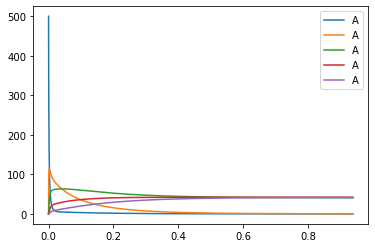

In [20]:
nodes_list = ['A','B','AB']
#nodes_list = ['AB','BMS','ABS','AMS','ABMS','AM','BM','MS']
optim.plot_observable(0,nodes_list)



**After 750 optimization iterations**


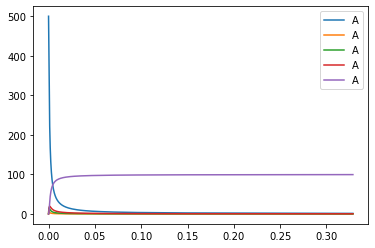

In [21]:

optim.plot_observable(-1,nodes_list)


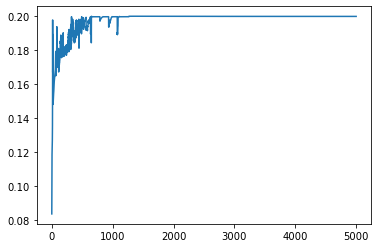

In [22]:
optim.plot_yield()

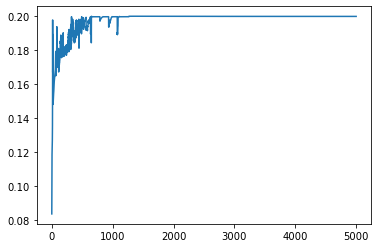

In [23]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(optim.yield_per_iter)

It seems like we've found a stable solution that produces greater yield than equilibrium. This should be thermodynamically
impossible. Let's try to find an explanation. We'll run simulations using the learned optimal parameters at a few different
timescales.

No handles with labels found to put in legend.


Using CPU
Next time:  tensor(272.9096, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
Using CPU


No handles with labels found to put in legend.
No handles with labels found to put in legend.


Next time:  tensor(272.9096, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
Using CPU
Next time:  tensor(543.8827, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.
Using CPU
Next time:  tensor(1085.8293, dtype=torch.float64, grad_fn=<AddBackward0>)
Next time larger than simulation runtime. Ending simulation.


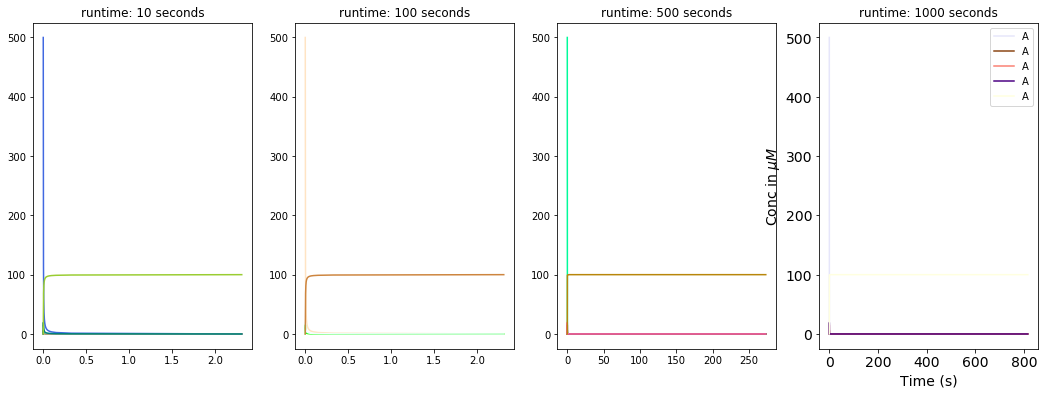

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 4)
optim_rn = optim.rn
for i, runtime in enumerate([10, 100, 500,1000]):
    optim_rn.reset()
    sim = VecSim(optim_rn, runtime, device='cpu')
    y = sim.simulate()
    sim.plot_observable(nodes_list,ax=ax[i])
    ax[i].set_title("runtime: " + str(runtime) + " seconds")
fig.set_size_inches(18, 6)
plt.show()

In [25]:
# def get_max_edge(n):
#     """
#     Calculates the max rate (k_on) for a given node
#     To find out the maximum flow path to the final complex starting from the current node.
    
#     Can also calculate the total rate of consumption of a node by summing up all rates. 
#     Can tell which component is used quickly.
#     """
#     try:
#         edges = rn.network.out_edges(n)
#         #Loop over all edges
#         #Get attributes
#         kon_max = -1
#         next_node = -1

#         kon_sum = 0
#         total_flux_outedges = 0
#         total_flux_inedges = 0
#         if len(edges)==0:
#             return(False)
            
#         for edge in edges:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]
#             kon_sum+=temp_kon
            
#             if temp_kon > kon_max:
#                 kon_max = temp_kon
#                 next_node=edge[1]
             
#         return(kon_max,next_node,kon_sum)
#     except Exception as err:
#         raise(err)

        
# def get_node_flux(n):
#     total_flux_outedges = 0
#     total_flux_inedges = 0
#     #Go over all the out edges
#     edges_out = rn.network.out_edges(n)
#     if len(edges_out)>0:

#         for edge in edges_out:
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             #print(data)
#             #Get uid
#             uid = data['uid']

#             #Get updated kon
#             temp_kon = vec_rn.kon[uid]

#             #Calculate k_off also
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Getting conc. of reactants and products
#             #Get product
#             prod = gtostr(rn.network.nodes[edge[1]]['struct']) 
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))

#             #Net flux from this edge = Generation - consumption
#             edge_flux = koff*vec_rn.copies_vec[edge[1]] - temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])
#             #edge_flux = koff*vec_rn.copies_vec[edge[1]] 

#             print("Reaction: ", gtostr(rn.network.nodes[edge[0]]['struct']), "+",react," -> ",prod)
#             print("Net flux: ",edge_flux)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Reaction data OUTWARD: ")
#             print(data)

#             total_flux_outedges+=edge_flux
    
#     #Now go over all the in edges
#     edges_in = rn.network.in_edges(n)
#     react_list = []
#     if len(edges_in) > 0:
#         for edge in edges_in:
#             if edge[0] in react_list:
#                 continue
#             data = rn.network.get_edge_data(edge[0],edge[1])
#             uid = data['uid']


#             #Get generation rates; which would be kon
#             temp_kon = vec_rn.kon[uid]

#             #Get consumption rates; which is k_off
#             std_c = Tensor([1.])
#             l_kon = torch.log(temp_kon)
#             l_koff = (vec_rn.rxn_score_vec[uid] * 1. / (vec_rn._R * vec_rn._T)) + l_kon + torch.log(std_c)
#             koff = torch.exp(l_koff)

#             #Get conc. of reactants and products
#             prod = gtostr(rn.network.nodes[edge[1]]['struct'])
#             #Get other reactant
#             react = "".join(sorted(list(set(prod) - set(gtostr(rn.network.nodes[edge[0]]['struct']) ))))
#             react_list.append(node_map[react])
#             #Net flux from this edge = Generation - consumption
#             edge_flux_in = temp_kon*(vec_rn.copies_vec[edge[0]])*(vec_rn.copies_vec[node_map[react]])- koff*vec_rn.copies_vec[edge[1]]
#             #edge_flux_in = koff*vec_rn.copies_vec[edge[1]]
            


#             print("Reaction: ", prod ," -> ",gtostr(rn.network.nodes[edge[0]]['struct']), "+",react)
#             print("Net flux: ",edge_flux_in)
#             print("kon : ",temp_kon)
#             print("koff: ",koff)
#             print("Raction data INWARD: ")
#             print(data)

#             total_flux_inedges+=edge_flux_in
#     net_node_flux = total_flux_outedges + total_flux_inedges
    
#     return(net_node_flux)
    
# pathway = []
# kon_sumarray = []
# total_con_rate = {}
# net_flux = {}
# for n in rn.network.nodes():
    
#     n_str = gtostr(rn.network.nodes[n]['struct']) 
    
#     paths = [n_str]
#     kon_sum = 0
#     temp_node = n
#     max_edge = True
#     consumption_rate = 0
#     if n < len(rn.network.nodes()):#num_monomers:
# #         print("Current node: ")
# #         print(n_str)
#         while max_edge:
#             max_edge = get_max_edge(temp_node)
#             if max_edge:
#                 total_con_rate[gtostr(rn.network.nodes[temp_node]['struct'])] = max_edge[2]
                
#                 temp_node = max_edge[1]
#                 kon_sum += max_edge[0].item()
                
                
# #                 print("Next node: ")
# #                 print(temp_node)

#                 paths.append(gtostr(rn.network.nodes[temp_node]['struct']))
#             else:
#                 break
#         pathway.append(paths)
#         kon_sumarray.append(kon_sum)
#         paths=[]
#     print("-------------------------------------------------------------------------------")
#     print("-------------------------------------------------------------------------------")
#     print("|                                                                             |")
#     node_flux = get_node_flux(n)
#     net_flux[gtostr(rn.network.nodes[n]['struct'])] = node_flux
#     print("|                                                                             |")
#     print("-------------------------------------------------------------------------------")
#     print("-------------------------------------------------------------------------------")

# print(pathway)
# print(kon_sumarray)

# #print(total_con_rate)

In [26]:
# for k,v in sorted(net_flux.items(),key=lambda x : x[1]):
#     print(k," : ", v)

print(vec_rn.copies_vec)
print(vec_rn.kon)

tensor([1.7347e-18, 2.1249e-03, 1.5878e-16, 0.0000e+00, 1.0002e+02],
       dtype=torch.float64, grad_fn=<MaxBackward2>)
Parameter containing:
tensor([ 0.4348, 30.5194, 10.0900,  6.6514], dtype=torch.float64,
       requires_grad=True)


In [27]:
print(solution)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(init_val=vec_rn.copies_vec.detach().numpy().tolist())
#solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

NameError: name 'solution' is not defined

In [ ]:
print(solution)
poly_system = EquilibriumSolver(rn)
solution = poly_system.solve(verifyBool = False)
if solution == None:
    print("No Equilibrium solution")
else:
    print(solution)
    print("Equilibrium expected yield: ", 100 * solution[-1] / min(vec_rn.initial_copies[:vec_rn.num_monomers]), '%')
print(vec_rn.kon)

Clearly, the equilibrium reached by the system still matches the equilibrium solution. We have however found a set of parameters that can increase available complete AP2 at some point before equilibrium to levels significantly higher than at equilibrium. We don't observe any trapping, but have uncovered an interesting effect. 

Now we'll move on to looking at ARP23. This is 7 subunits, which drastically increases the number of possible reactions. Expect longer runtimes. 